In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import copy

#import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import keras as K
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError, MeanAbsolutePercentageError
from sklearn import preprocessing

#from keras import regularizers
#from keras.layers import Dense

Using TensorFlow backend.


In [2]:
table = pd.read_csv('Heston_data_input')
X = table.drop(['C_price','delta'], axis=1)
y = table[['C_price']]
#X = df[['k','T','C_price']]
#y = df[['v0','rho','kappa','theta','sigma']]

In [3]:
X

,k,T,v0,rho,kappa,theta,sigma
0,-0.2,1.0,0.316228,-1.0,0.0010,0.0010,0.0010
1,-0.2,1.0,0.316228,0.0,0.0010,0.0010,0.0010
2,-0.2,1.0,0.316228,1.0,0.0010,0.0010,0.0010
3,-0.2,1.0,0.431975,-1.0,0.0010,0.0010,0.0010
4,-0.2,1.0,0.431975,0.0,0.0010,0.0010,0.0010
...,...,...,...,...,...,...,...
58,0.0,1.0,0.431975,1.0,10.0005,5.0005,10.0005
59,0.0,1.0,0.547723,1.0,10.0005,5.0005,10.0005
60,0.2,1.0,0.316228,1.0,10.0005,5.0005,10.0005
61,0.2,1.0,0.431975,1.0,10.0005,5.0005,10.0005


In [4]:
y

,C_price
0,0.381700
1,0.381708
2,0.381715
3,0.418517
4,0.418538
...,...
58,0.007158
59,0.006894
60,0.006416
61,0.006180


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)
input_scaler = preprocessing.MinMaxScaler()
output_scaler = preprocessing.MinMaxScaler()
X_train_scaled = input_scaler.fit_transform(X_train)
#y_train_scaled = output_scaler.fit_transform(y_train)
y_train_scaled = y_train # no scaling
#X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0],X_train_scaled.shape[1],1) # for lstm
X_test_scaled = input_scaler.transform(X_test)
y_test_scaled = y_test # no scaling

In [6]:
# parameters
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
#num_epochs = 50000
#num_epochs = 30000
#num_epochs = 20000
#num_epochs = 10000
num_epochs = 5000
num_neurons = 128
num_sigmoid = 8
batch_size = 512

# design the neural network model
model = Sequential()
model.add(Dense(num_neurons, input_dim=input_dim, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(output_dim, activation='relu')) # Output layer

# define the loss function and optimization algorithm
#opt = keras.optimizers.Adam(learning_rate = 0.0005)
opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss=MeanSquaredError(), optimizer=keras.optimizers.Adam(learning_rate = 0.0001), metrics=['mse']) # MeanAbsoluteError
#model.compile(loss=MeanAbsolutePercentageError(), optimizer=keras.optimizers.Adam(learning_rate = 0.01), metrics=['mse']) # MeanAbsoluteError
#model.compile(loss=keras.losses.MeanAbsolutePercentageError(), optimizer=opt, metrics=['mse'])

# ft the model on the training dataset
history = model.fit(X_train_scaled, y_train_scaled, epochs=num_epochs, batch_size=256, verbose=1, validation_split = 0.2)
# make predictions for the input data
y_predict_scaled = model.predict(X_test_scaled)

Epoch 1/5000
1/1 [==============================] - 0s 335ms/step - loss: 0.1072 - mse: 0.1072 - val_loss: 0.0904 - val_mse: 0.0904
Epoch 2/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.1064 - mse: 0.1064 - val_loss: 0.0896 - val_mse: 0.0896
Epoch 3/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1055 - mse: 0.1055 - val_loss: 0.0889 - val_mse: 0.0889
Epoch 4/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1047 - mse: 0.1047 - val_loss: 0.0881 - val_mse: 0.0881
Epoch 5/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1039 - mse: 0.1039 - val_loss: 0.0874 - val_mse: 0.0874
Epoch 6/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1031 - mse: 0.1031 - val_loss: 0.0867 - val_mse: 0.0867
Epoch 7/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1023 - mse: 0.1023 - val_loss: 0.0859 - val_mse: 0.0859
Epoch 8/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.1015 - 

1/1 [==============================] - 0s 23ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 64/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 65/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 66/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 67/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 68/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 69/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 70/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.0188 - mse: 0.

Epoch 125/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 126/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 127/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 128/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 129/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 130/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 131/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 132/5000
1/1 [==============================] - 0s 21ms/step - 

Epoch 184/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.0546e-04 - mse: 3.9259e-04 - val_loss: 5.1331e-04 - val_mse: 5.0116e-04
Epoch 185/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.8974e-04 - mse: 3.7686e-04 - val_loss: 5.0265e-04 - val_mse: 4.9049e-04
Epoch 186/5000
1/1 [==============================] - 0s 17ms/step - loss: 3.7474e-04 - mse: 3.6185e-04 - val_loss: 4.9269e-04 - val_mse: 4.8052e-04
Epoch 187/5000
1/1 [==============================] - 0s 17ms/step - loss: 3.6043e-04 - mse: 3.4753e-04 - val_loss: 4.8303e-04 - val_mse: 4.7085e-04
Epoch 188/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.4658e-04 - mse: 3.3368e-04 - val_loss: 4.7325e-04 - val_mse: 4.6107e-04
Epoch 189/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.3353e-04 - mse: 3.2061e-04 - val_loss: 4.6368e-04 - val_mse: 4.5150e-04
Epoch 190/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.2116e-04 - mse: 3.0824e-04 - 

Epoch 239/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.1315e-04 - mse: 1.0021e-04 - val_loss: 3.1904e-04 - val_mse: 3.0689e-04
Epoch 240/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1147e-04 - mse: 9.8536e-05 - val_loss: 3.1744e-04 - val_mse: 3.0530e-04
Epoch 241/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0983e-04 - mse: 9.6901e-05 - val_loss: 3.1617e-04 - val_mse: 3.0403e-04
Epoch 242/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0822e-04 - mse: 9.5290e-05 - val_loss: 3.1511e-04 - val_mse: 3.0297e-04
Epoch 243/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.0662e-04 - mse: 9.3691e-05 - val_loss: 3.1412e-04 - val_mse: 3.0198e-04
Epoch 244/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.0505e-04 - mse: 9.2119e-05 - val_loss: 3.1260e-04 - val_mse: 3.0047e-04
Epoch 245/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0352e-04 - mse: 9.0593e-05 - 

Epoch 294/5000
1/1 [==============================] - 0s 19ms/step - loss: 5.2861e-05 - mse: 3.9966e-05 - val_loss: 2.2945e-04 - val_mse: 2.1740e-04
Epoch 295/5000
1/1 [==============================] - 0s 17ms/step - loss: 5.2188e-05 - mse: 3.9294e-05 - val_loss: 2.2772e-04 - val_mse: 2.1567e-04
Epoch 296/5000
1/1 [==============================] - 0s 17ms/step - loss: 5.1525e-05 - mse: 3.8631e-05 - val_loss: 2.2604e-04 - val_mse: 2.1399e-04
Epoch 297/5000
1/1 [==============================] - 0s 18ms/step - loss: 5.0874e-05 - mse: 3.7980e-05 - val_loss: 2.2435e-04 - val_mse: 2.1231e-04
Epoch 298/5000
1/1 [==============================] - 0s 26ms/step - loss: 5.0230e-05 - mse: 3.7335e-05 - val_loss: 2.2280e-04 - val_mse: 2.1076e-04
Epoch 299/5000
1/1 [==============================] - 0s 22ms/step - loss: 4.9599e-05 - mse: 3.6704e-05 - val_loss: 2.2091e-04 - val_mse: 2.0887e-04
Epoch 300/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.8978e-05 - mse: 3.6083e-05 - 

Epoch 349/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.7634e-05 - mse: 1.4752e-05 - val_loss: 1.6096e-04 - val_mse: 1.4897e-04
Epoch 350/5000
1/1 [==============================] - 0s 17ms/step - loss: 2.7355e-05 - mse: 1.4474e-05 - val_loss: 1.6017e-04 - val_mse: 1.4817e-04
Epoch 351/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.7079e-05 - mse: 1.4198e-05 - val_loss: 1.5935e-04 - val_mse: 1.4736e-04
Epoch 352/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6808e-05 - mse: 1.3927e-05 - val_loss: 1.5859e-04 - val_mse: 1.4660e-04
Epoch 353/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.6544e-05 - mse: 1.3663e-05 - val_loss: 1.5806e-04 - val_mse: 1.4607e-04
Epoch 354/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.6281e-05 - mse: 1.3400e-05 - val_loss: 1.5743e-04 - val_mse: 1.4544e-04
Epoch 355/5000
1/1 [==============================] - 0s 16ms/step - loss: 2.6023e-05 - mse: 1.3141e-05 - 

Epoch 404/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7975e-05 - mse: 5.1050e-06 - val_loss: 1.2363e-04 - val_mse: 1.1167e-04
Epoch 405/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.7878e-05 - mse: 5.0084e-06 - val_loss: 1.2326e-04 - val_mse: 1.1130e-04
Epoch 406/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.7784e-05 - mse: 4.9147e-06 - val_loss: 1.2277e-04 - val_mse: 1.1081e-04
Epoch 407/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.7692e-05 - mse: 4.8223e-06 - val_loss: 1.2223e-04 - val_mse: 1.1027e-04
Epoch 408/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.7601e-05 - mse: 4.7321e-06 - val_loss: 1.2171e-04 - val_mse: 1.0975e-04
Epoch 409/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.7515e-05 - mse: 4.6461e-06 - val_loss: 1.2128e-04 - val_mse: 1.0932e-04
Epoch 410/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.7430e-05 - mse: 4.5616e-06 - 

Epoch 459/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.4831e-05 - mse: 1.9787e-06 - val_loss: 1.0557e-04 - val_mse: 9.3636e-05
Epoch 460/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.4802e-05 - mse: 1.9499e-06 - val_loss: 1.0535e-04 - val_mse: 9.3419e-05
Epoch 461/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.4774e-05 - mse: 1.9219e-06 - val_loss: 1.0512e-04 - val_mse: 9.3185e-05
Epoch 462/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.4746e-05 - mse: 1.8944e-06 - val_loss: 1.0487e-04 - val_mse: 9.2937e-05
Epoch 463/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.4719e-05 - mse: 1.8676e-06 - val_loss: 1.0466e-04 - val_mse: 9.2730e-05
Epoch 464/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.4692e-05 - mse: 1.8417e-06 - val_loss: 1.0447e-04 - val_mse: 9.2541e-05
Epoch 465/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.4666e-05 - mse: 1.8156e-06 - 

Epoch 514/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.3823e-05 - mse: 9.9796e-07 - val_loss: 9.6233e-05 - val_mse: 8.4331e-05
Epoch 515/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3813e-05 - mse: 9.8793e-07 - val_loss: 9.6123e-05 - val_mse: 8.4221e-05
Epoch 516/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.3802e-05 - mse: 9.7809e-07 - val_loss: 9.6009e-05 - val_mse: 8.4108e-05
Epoch 517/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3792e-05 - mse: 9.6845e-07 - val_loss: 9.5880e-05 - val_mse: 8.3980e-05
Epoch 518/5000
1/1 [==============================] - 0s 34ms/step - loss: 1.3782e-05 - mse: 9.5891e-07 - val_loss: 9.5777e-05 - val_mse: 8.3878e-05
Epoch 519/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3772e-05 - mse: 9.4947e-07 - val_loss: 9.5685e-05 - val_mse: 8.3786e-05
Epoch 520/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3763e-05 - mse: 9.4041e-07 - 

Epoch 569/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.3415e-05 - mse: 6.2033e-07 - val_loss: 9.1823e-05 - val_mse: 7.9952e-05
Epoch 570/5000
1/1 [==============================] - 0s 27ms/step - loss: 1.3410e-05 - mse: 6.1573e-07 - val_loss: 9.1758e-05 - val_mse: 7.9887e-05
Epoch 571/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.3405e-05 - mse: 6.1115e-07 - val_loss: 9.1695e-05 - val_mse: 7.9825e-05
Epoch 572/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.3400e-05 - mse: 6.0680e-07 - val_loss: 9.1634e-05 - val_mse: 7.9765e-05
Epoch 573/5000
1/1 [==============================] - 0s 31ms/step - loss: 1.3395e-05 - mse: 6.0253e-07 - val_loss: 9.1572e-05 - val_mse: 7.9703e-05
Epoch 574/5000
1/1 [==============================] - 0s 29ms/step - loss: 1.3390e-05 - mse: 5.9820e-07 - val_loss: 9.1505e-05 - val_mse: 7.9637e-05
Epoch 575/5000
1/1 [==============================] - 0s 29ms/step - loss: 1.3386e-05 - mse: 5.9398e-07 - 

Epoch 624/5000
1/1 [==============================] - 0s 27ms/step - loss: 1.3198e-05 - mse: 4.3627e-07 - val_loss: 8.9583e-05 - val_mse: 7.7745e-05
Epoch 625/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.3195e-05 - mse: 4.3385e-07 - val_loss: 8.9561e-05 - val_mse: 7.7724e-05
Epoch 626/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.3192e-05 - mse: 4.3140e-07 - val_loss: 8.9553e-05 - val_mse: 7.7716e-05
Epoch 627/5000
1/1 [==============================] - 0s 29ms/step - loss: 1.3189e-05 - mse: 4.2899e-07 - val_loss: 8.9536e-05 - val_mse: 7.7700e-05
Epoch 628/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.3186e-05 - mse: 4.2656e-07 - val_loss: 8.9503e-05 - val_mse: 7.7667e-05
Epoch 629/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3183e-05 - mse: 4.2425e-07 - val_loss: 8.9462e-05 - val_mse: 7.7627e-05
Epoch 630/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.3180e-05 - mse: 4.2205e-07 - 

Epoch 679/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.3053e-05 - mse: 3.2728e-07 - val_loss: 8.8434e-05 - val_mse: 7.6630e-05
Epoch 680/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3050e-05 - mse: 3.2565e-07 - val_loss: 8.8407e-05 - val_mse: 7.6604e-05
Epoch 681/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.3048e-05 - mse: 3.2412e-07 - val_loss: 8.8388e-05 - val_mse: 7.6585e-05
Epoch 682/5000
1/1 [==============================] - 0s 31ms/step - loss: 1.3046e-05 - mse: 3.2261e-07 - val_loss: 8.8370e-05 - val_mse: 7.6568e-05
Epoch 683/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.3044e-05 - mse: 3.2112e-07 - val_loss: 8.8343e-05 - val_mse: 7.6542e-05
Epoch 684/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.3042e-05 - mse: 3.1966e-07 - val_loss: 8.8305e-05 - val_mse: 7.6504e-05
Epoch 685/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.3040e-05 - mse: 3.1821e-07 - 

Epoch 734/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.2947e-05 - mse: 2.5959e-07 - val_loss: 8.7268e-05 - val_mse: 7.5499e-05
Epoch 735/5000
1/1 [==============================] - 0s 29ms/step - loss: 1.2946e-05 - mse: 2.5861e-07 - val_loss: 8.7255e-05 - val_mse: 7.5487e-05
Epoch 736/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.2944e-05 - mse: 2.5764e-07 - val_loss: 8.7239e-05 - val_mse: 7.5472e-05
Epoch 737/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.2942e-05 - mse: 2.5670e-07 - val_loss: 8.7215e-05 - val_mse: 7.5448e-05
Epoch 738/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2941e-05 - mse: 2.5576e-07 - val_loss: 8.7187e-05 - val_mse: 7.5421e-05
Epoch 739/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.2939e-05 - mse: 2.5485e-07 - val_loss: 8.7168e-05 - val_mse: 7.5403e-05
Epoch 740/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.2937e-05 - mse: 2.5391e-07 - 

Epoch 789/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.2863e-05 - mse: 2.1630e-07 - val_loss: 8.6641e-05 - val_mse: 7.4910e-05
Epoch 790/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.2861e-05 - mse: 2.1573e-07 - val_loss: 8.6641e-05 - val_mse: 7.4911e-05
Epoch 791/5000
1/1 [==============================] - 0s 34ms/step - loss: 1.2860e-05 - mse: 2.1513e-07 - val_loss: 8.6640e-05 - val_mse: 7.4911e-05
Epoch 792/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.2859e-05 - mse: 2.1456e-07 - val_loss: 8.6631e-05 - val_mse: 7.4902e-05
Epoch 793/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.2857e-05 - mse: 2.1401e-07 - val_loss: 8.6619e-05 - val_mse: 7.4891e-05
Epoch 794/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.2856e-05 - mse: 2.1348e-07 - val_loss: 8.6619e-05 - val_mse: 7.4892e-05
Epoch 795/5000
1/1 [==============================] - 0s 32ms/step - loss: 1.2855e-05 - mse: 2.1292e-07 - 

Epoch 844/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.2794e-05 - mse: 1.9025e-07 - val_loss: 8.6272e-05 - val_mse: 7.4581e-05
Epoch 845/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.2793e-05 - mse: 1.8984e-07 - val_loss: 8.6262e-05 - val_mse: 7.4571e-05
Epoch 846/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2792e-05 - mse: 1.8948e-07 - val_loss: 8.6248e-05 - val_mse: 7.4559e-05
Epoch 847/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.2790e-05 - mse: 1.8913e-07 - val_loss: 8.6243e-05 - val_mse: 7.4554e-05
Epoch 848/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.2789e-05 - mse: 1.8874e-07 - val_loss: 8.6242e-05 - val_mse: 7.4554e-05
Epoch 849/5000
1/1 [==============================] - 0s 32ms/step - loss: 1.2788e-05 - mse: 1.8835e-07 - val_loss: 8.6237e-05 - val_mse: 7.4549e-05
Epoch 850/5000
1/1 [==============================] - 0s 53ms/step - loss: 1.2787e-05 - mse: 1.8797e-07 - 

1/1 [==============================] - 0s 45ms/step - loss: 1.2731e-05 - mse: 1.7173e-07 - val_loss: 8.5972e-05 - val_mse: 7.4321e-05
Epoch 899/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.2730e-05 - mse: 1.7141e-07 - val_loss: 8.5970e-05 - val_mse: 7.4320e-05
Epoch 900/5000
1/1 [==============================] - 0s 53ms/step - loss: 1.2729e-05 - mse: 1.7109e-07 - val_loss: 8.5967e-05 - val_mse: 7.4318e-05
Epoch 901/5000
1/1 [==============================] - 0s 50ms/step - loss: 1.2728e-05 - mse: 1.7077e-07 - val_loss: 8.5964e-05 - val_mse: 7.4316e-05
Epoch 902/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.2726e-05 - mse: 1.7046e-07 - val_loss: 8.5962e-05 - val_mse: 7.4315e-05
Epoch 903/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.2725e-05 - mse: 1.7016e-07 - val_loss: 8.5961e-05 - val_mse: 7.4315e-05
Epoch 904/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.2724e-05 - mse: 1.6982e-07 - val_loss: 8.595

1/1 [==============================] - 0s 47ms/step - loss: 1.2667e-05 - mse: 1.5582e-07 - val_loss: 8.5849e-05 - val_mse: 7.4243e-05
Epoch 954/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.2666e-05 - mse: 1.5555e-07 - val_loss: 8.5847e-05 - val_mse: 7.4242e-05
Epoch 955/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.2665e-05 - mse: 1.5530e-07 - val_loss: 8.5845e-05 - val_mse: 7.4240e-05
Epoch 956/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.2664e-05 - mse: 1.5503e-07 - val_loss: 8.5841e-05 - val_mse: 7.4237e-05
Epoch 957/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.2662e-05 - mse: 1.5477e-07 - val_loss: 8.5838e-05 - val_mse: 7.4235e-05
Epoch 958/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.2661e-05 - mse: 1.5451e-07 - val_loss: 8.5831e-05 - val_mse: 7.4229e-05
Epoch 959/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.2660e-05 - mse: 1.5427e-07 - val_loss: 8.582

Epoch 1008/5000
1/1 [==============================] - 0s 50ms/step - loss: 1.2605e-05 - mse: 1.4213e-07 - val_loss: 8.5566e-05 - val_mse: 7.4004e-05
Epoch 1009/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.2603e-05 - mse: 1.4191e-07 - val_loss: 8.5558e-05 - val_mse: 7.3997e-05
Epoch 1010/5000
1/1 [==============================] - 0s 54ms/step - loss: 1.2602e-05 - mse: 1.4168e-07 - val_loss: 8.5551e-05 - val_mse: 7.3991e-05
Epoch 1011/5000
1/1 [==============================] - 0s 73ms/step - loss: 1.2601e-05 - mse: 1.4144e-07 - val_loss: 8.5549e-05 - val_mse: 7.3990e-05
Epoch 1012/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.2600e-05 - mse: 1.4119e-07 - val_loss: 8.5545e-05 - val_mse: 7.3986e-05
Epoch 1013/5000
1/1 [==============================] - 0s 55ms/step - loss: 1.2599e-05 - mse: 1.4094e-07 - val_loss: 8.5537e-05 - val_mse: 7.3979e-05
Epoch 1014/5000
1/1 [==============================] - 0s 50ms/step - loss: 1.2598e-05 - mse: 1.4071

1/1 [==============================] - 0s 40ms/step - loss: 1.2544e-05 - mse: 1.3035e-07 - val_loss: 8.5358e-05 - val_mse: 7.3841e-05
Epoch 1063/5000
1/1 [==============================] - 0s 72ms/step - loss: 1.2543e-05 - mse: 1.3014e-07 - val_loss: 8.5355e-05 - val_mse: 7.3838e-05
Epoch 1064/5000
1/1 [==============================] - 0s 53ms/step - loss: 1.2542e-05 - mse: 1.2994e-07 - val_loss: 8.5351e-05 - val_mse: 7.3836e-05
Epoch 1065/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.2541e-05 - mse: 1.2975e-07 - val_loss: 8.5346e-05 - val_mse: 7.3832e-05
Epoch 1066/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.2540e-05 - mse: 1.2955e-07 - val_loss: 8.5343e-05 - val_mse: 7.3829e-05
Epoch 1067/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.2539e-05 - mse: 1.2937e-07 - val_loss: 8.5343e-05 - val_mse: 7.3830e-05
Epoch 1068/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.2537e-05 - mse: 1.2916e-07 - val_loss:

Epoch 1117/5000
1/1 [==============================] - 0s 52ms/step - loss: 1.2481e-05 - mse: 1.1823e-07 - val_loss: 8.5087e-05 - val_mse: 7.3617e-05
Epoch 1118/5000
1/1 [==============================] - 0s 52ms/step - loss: 1.2480e-05 - mse: 1.1795e-07 - val_loss: 8.5083e-05 - val_mse: 7.3614e-05
Epoch 1119/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.2479e-05 - mse: 1.1768e-07 - val_loss: 8.5080e-05 - val_mse: 7.3611e-05
Epoch 1120/5000
1/1 [==============================] - 0s 53ms/step - loss: 1.2477e-05 - mse: 1.1727e-07 - val_loss: 8.5073e-05 - val_mse: 7.3605e-05
Epoch 1121/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.2476e-05 - mse: 1.1682e-07 - val_loss: 8.5060e-05 - val_mse: 7.3593e-05
Epoch 1122/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.2474e-05 - mse: 1.1636e-07 - val_loss: 8.5050e-05 - val_mse: 7.3584e-05
Epoch 1123/5000
1/1 [==============================] - 0s 54ms/step - loss: 1.2473e-05 - mse: 1.1585

1/1 [==============================] - 0s 46ms/step - loss: 1.2413e-05 - mse: 1.0168e-07 - val_loss: 8.4502e-05 - val_mse: 7.3079e-05
Epoch 1172/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.2412e-05 - mse: 1.0152e-07 - val_loss: 8.4493e-05 - val_mse: 7.3071e-05
Epoch 1173/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.2411e-05 - mse: 1.0135e-07 - val_loss: 8.4479e-05 - val_mse: 7.3058e-05
Epoch 1174/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.2410e-05 - mse: 1.0121e-07 - val_loss: 8.4466e-05 - val_mse: 7.3046e-05
Epoch 1175/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.2409e-05 - mse: 1.0106e-07 - val_loss: 8.4455e-05 - val_mse: 7.3035e-05
Epoch 1176/5000
1/1 [==============================] - 0s 48ms/step - loss: 1.2408e-05 - mse: 1.0091e-07 - val_loss: 8.4445e-05 - val_mse: 7.3027e-05
Epoch 1177/5000
1/1 [==============================] - 0s 48ms/step - loss: 1.2406e-05 - mse: 1.0075e-07 - val_loss:

Epoch 1226/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.2352e-05 - mse: 9.3535e-08 - val_loss: 8.4027e-05 - val_mse: 7.2653e-05
Epoch 1227/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.2351e-05 - mse: 9.3398e-08 - val_loss: 8.4022e-05 - val_mse: 7.2648e-05
Epoch 1228/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.2350e-05 - mse: 9.3262e-08 - val_loss: 8.4018e-05 - val_mse: 7.2646e-05
Epoch 1229/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.2349e-05 - mse: 9.3123e-08 - val_loss: 8.4014e-05 - val_mse: 7.2643e-05
Epoch 1230/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.2347e-05 - mse: 9.2988e-08 - val_loss: 8.4010e-05 - val_mse: 7.2639e-05
Epoch 1231/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.2346e-05 - mse: 9.2851e-08 - val_loss: 8.4008e-05 - val_mse: 7.2638e-05
Epoch 1232/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.2345e-05 - mse: 9.2709

1/1 [==============================] - 0s 38ms/step - loss: 1.2291e-05 - mse: 8.6290e-08 - val_loss: 8.3708e-05 - val_mse: 7.2383e-05
Epoch 1281/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.2290e-05 - mse: 8.6160e-08 - val_loss: 8.3706e-05 - val_mse: 7.2382e-05
Epoch 1282/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.2289e-05 - mse: 8.6020e-08 - val_loss: 8.3701e-05 - val_mse: 7.2378e-05
Epoch 1283/5000
1/1 [==============================] - 0s 48ms/step - loss: 1.2288e-05 - mse: 8.5890e-08 - val_loss: 8.3692e-05 - val_mse: 7.2370e-05
Epoch 1284/5000
1/1 [==============================] - 0s 52ms/step - loss: 1.2287e-05 - mse: 8.5778e-08 - val_loss: 8.3684e-05 - val_mse: 7.2362e-05
Epoch 1285/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.2285e-05 - mse: 8.5656e-08 - val_loss: 8.3677e-05 - val_mse: 7.2356e-05
Epoch 1286/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.2284e-05 - mse: 8.5529e-08 - val_loss:

Epoch 1335/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.2228e-05 - mse: 7.9174e-08 - val_loss: 8.3120e-05 - val_mse: 7.1846e-05
Epoch 1336/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.2227e-05 - mse: 7.9035e-08 - val_loss: 8.3110e-05 - val_mse: 7.1837e-05
Epoch 1337/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.2226e-05 - mse: 7.8879e-08 - val_loss: 8.3099e-05 - val_mse: 7.1827e-05
Epoch 1338/5000
1/1 [==============================] - 0s 48ms/step - loss: 1.2224e-05 - mse: 7.8732e-08 - val_loss: 8.3084e-05 - val_mse: 7.1814e-05
Epoch 1339/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.2223e-05 - mse: 7.8596e-08 - val_loss: 8.3069e-05 - val_mse: 7.1799e-05
Epoch 1340/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.2222e-05 - mse: 7.8461e-08 - val_loss: 8.3055e-05 - val_mse: 7.1787e-05
Epoch 1341/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.2221e-05 - mse: 7.8310

1/1 [==============================] - 0s 40ms/step - loss: 1.2164e-05 - mse: 7.1976e-08 - val_loss: 8.2545e-05 - val_mse: 7.1323e-05
Epoch 1390/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.2163e-05 - mse: 7.1864e-08 - val_loss: 8.2536e-05 - val_mse: 7.1316e-05
Epoch 1391/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.2162e-05 - mse: 7.1747e-08 - val_loss: 8.2530e-05 - val_mse: 7.1310e-05
Epoch 1392/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.2161e-05 - mse: 7.1630e-08 - val_loss: 8.2521e-05 - val_mse: 7.1302e-05
Epoch 1393/5000
1/1 [==============================] - 0s 50ms/step - loss: 1.2160e-05 - mse: 7.1518e-08 - val_loss: 8.2512e-05 - val_mse: 7.1294e-05
Epoch 1394/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.2159e-05 - mse: 7.1410e-08 - val_loss: 8.2506e-05 - val_mse: 7.1289e-05
Epoch 1395/5000
1/1 [==============================] - 0s 50ms/step - loss: 1.2157e-05 - mse: 7.1291e-08 - val_loss:

Epoch 1444/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.2101e-05 - mse: 6.6128e-08 - val_loss: 8.2092e-05 - val_mse: 7.0924e-05
Epoch 1445/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.2100e-05 - mse: 6.6017e-08 - val_loss: 8.2088e-05 - val_mse: 7.0921e-05
Epoch 1446/5000
1/1 [==============================] - 0s 34ms/step - loss: 1.2098e-05 - mse: 6.5896e-08 - val_loss: 8.2080e-05 - val_mse: 7.0914e-05
Epoch 1447/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.2097e-05 - mse: 6.5785e-08 - val_loss: 8.2069e-05 - val_mse: 7.0903e-05
Epoch 1448/5000
1/1 [==============================] - 0s 53ms/step - loss: 1.2096e-05 - mse: 6.5689e-08 - val_loss: 8.2059e-05 - val_mse: 7.0895e-05
Epoch 1449/5000
1/1 [==============================] - 0s 50ms/step - loss: 1.2095e-05 - mse: 6.5589e-08 - val_loss: 8.2054e-05 - val_mse: 7.0891e-05
Epoch 1450/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.2094e-05 - mse: 6.5471

1/1 [==============================] - 0s 42ms/step - loss: 1.2038e-05 - mse: 6.0317e-08 - val_loss: 8.1557e-05 - val_mse: 7.0440e-05
Epoch 1499/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.2037e-05 - mse: 6.0220e-08 - val_loss: 8.1551e-05 - val_mse: 7.0435e-05
Epoch 1500/5000
1/1 [==============================] - 0s 54ms/step - loss: 1.2036e-05 - mse: 6.0114e-08 - val_loss: 8.1545e-05 - val_mse: 7.0430e-05
Epoch 1501/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.2035e-05 - mse: 6.0007e-08 - val_loss: 8.1535e-05 - val_mse: 7.0421e-05
Epoch 1502/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.2034e-05 - mse: 5.9914e-08 - val_loss: 8.1525e-05 - val_mse: 7.0412e-05
Epoch 1503/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.2033e-05 - mse: 5.9814e-08 - val_loss: 8.1520e-05 - val_mse: 7.0408e-05
Epoch 1504/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.2031e-05 - mse: 5.9703e-08 - val_loss:

1/1 [==============================] - 0s 52ms/step - loss: 1.1976e-05 - mse: 5.5137e-08 - val_loss: 8.1170e-05 - val_mse: 7.0107e-05
Epoch 1553/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.1975e-05 - mse: 5.5052e-08 - val_loss: 8.1160e-05 - val_mse: 7.0097e-05
Epoch 1554/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.1974e-05 - mse: 5.4968e-08 - val_loss: 8.1153e-05 - val_mse: 7.0091e-05
Epoch 1555/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.1973e-05 - mse: 5.4862e-08 - val_loss: 8.1143e-05 - val_mse: 7.0083e-05
Epoch 1556/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.1972e-05 - mse: 5.4773e-08 - val_loss: 8.1134e-05 - val_mse: 7.0074e-05
Epoch 1557/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.1970e-05 - mse: 5.4688e-08 - val_loss: 8.1126e-05 - val_mse: 7.0067e-05
Epoch 1558/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.1969e-05 - mse: 5.4603e-08 - val_loss:

1/1 [==============================] - 0s 46ms/step - loss: 1.1915e-05 - mse: 5.0677e-08 - val_loss: 8.0721e-05 - val_mse: 6.9710e-05
Epoch 1607/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.1913e-05 - mse: 5.0595e-08 - val_loss: 8.0714e-05 - val_mse: 6.9704e-05
Epoch 1608/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.1912e-05 - mse: 5.0508e-08 - val_loss: 8.0707e-05 - val_mse: 6.9698e-05
Epoch 1609/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.1911e-05 - mse: 5.0425e-08 - val_loss: 8.0698e-05 - val_mse: 6.9690e-05
Epoch 1610/5000
1/1 [==============================] - 0s 30ms/step - loss: 1.1910e-05 - mse: 5.0347e-08 - val_loss: 8.0688e-05 - val_mse: 6.9681e-05
Epoch 1611/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.1909e-05 - mse: 5.0273e-08 - val_loss: 8.0677e-05 - val_mse: 6.9671e-05
Epoch 1612/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.1908e-05 - mse: 5.0210e-08 - val_loss:

Epoch 1661/5000
1/1 [==============================] - 0s 51ms/step - loss: 1.1851e-05 - mse: 4.6364e-08 - val_loss: 8.0182e-05 - val_mse: 6.9226e-05
Epoch 1662/5000
1/1 [==============================] - 0s 65ms/step - loss: 1.1850e-05 - mse: 4.6285e-08 - val_loss: 8.0173e-05 - val_mse: 6.9218e-05
Epoch 1663/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.1849e-05 - mse: 4.6203e-08 - val_loss: 8.0162e-05 - val_mse: 6.9208e-05
Epoch 1664/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.1848e-05 - mse: 4.6128e-08 - val_loss: 8.0152e-05 - val_mse: 6.9199e-05
Epoch 1665/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.1847e-05 - mse: 4.6046e-08 - val_loss: 8.0144e-05 - val_mse: 6.9192e-05
Epoch 1666/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.1846e-05 - mse: 4.5958e-08 - val_loss: 8.0134e-05 - val_mse: 6.9183e-05
Epoch 1667/5000
1/1 [==============================] - 0s 48ms/step - loss: 1.1845e-05 - mse: 4.5874

1/1 [==============================] - 0s 51ms/step - loss: 1.1789e-05 - mse: 4.2333e-08 - val_loss: 7.9636e-05 - val_mse: 6.8735e-05
Epoch 1716/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.1787e-05 - mse: 4.2278e-08 - val_loss: 7.9625e-05 - val_mse: 6.8725e-05
Epoch 1717/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.1786e-05 - mse: 4.2201e-08 - val_loss: 7.9614e-05 - val_mse: 6.8715e-05
Epoch 1718/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.1785e-05 - mse: 4.2125e-08 - val_loss: 7.9600e-05 - val_mse: 6.8702e-05
Epoch 1719/5000
1/1 [==============================] - 0s 32ms/step - loss: 1.1784e-05 - mse: 4.2072e-08 - val_loss: 7.9588e-05 - val_mse: 6.8691e-05
Epoch 1720/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.1783e-05 - mse: 4.2014e-08 - val_loss: 7.9578e-05 - val_mse: 6.8682e-05
Epoch 1721/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.1781e-05 - mse: 4.1934e-08 - val_loss:

Epoch 1770/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.1723e-05 - mse: 3.8808e-08 - val_loss: 7.8790e-05 - val_mse: 6.7947e-05
Epoch 1771/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.1722e-05 - mse: 3.8755e-08 - val_loss: 7.8776e-05 - val_mse: 6.7933e-05
Epoch 1772/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.1721e-05 - mse: 3.8679e-08 - val_loss: 7.8761e-05 - val_mse: 6.7919e-05
Epoch 1773/5000
1/1 [==============================] - 0s 90ms/step - loss: 1.1720e-05 - mse: 3.8601e-08 - val_loss: 7.8742e-05 - val_mse: 6.7902e-05
Epoch 1774/5000
1/1 [==============================] - 0s 69ms/step - loss: 1.1718e-05 - mse: 3.8537e-08 - val_loss: 7.8722e-05 - val_mse: 6.7883e-05
Epoch 1775/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.1717e-05 - mse: 3.8488e-08 - val_loss: 7.8708e-05 - val_mse: 6.7870e-05
Epoch 1776/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.1716e-05 - mse: 3.8410

1/1 [==============================] - 0s 50ms/step - loss: 1.1658e-05 - mse: 3.5409e-08 - val_loss: 7.7922e-05 - val_mse: 6.7136e-05
Epoch 1825/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.1657e-05 - mse: 3.5352e-08 - val_loss: 7.7907e-05 - val_mse: 6.7123e-05
Epoch 1826/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.1655e-05 - mse: 3.5276e-08 - val_loss: 7.7889e-05 - val_mse: 6.7106e-05
Epoch 1827/5000
1/1 [==============================] - 0s 52ms/step - loss: 1.1654e-05 - mse: 3.5222e-08 - val_loss: 7.7872e-05 - val_mse: 6.7089e-05
Epoch 1828/5000
1/1 [==============================] - 0s 50ms/step - loss: 1.1653e-05 - mse: 3.5167e-08 - val_loss: 7.7857e-05 - val_mse: 6.7075e-05
Epoch 1829/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.1652e-05 - mse: 3.5103e-08 - val_loss: 7.7843e-05 - val_mse: 6.7062e-05
Epoch 1830/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.1650e-05 - mse: 3.5038e-08 - val_loss:

Epoch 1879/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.1590e-05 - mse: 3.1946e-08 - val_loss: 7.7199e-05 - val_mse: 6.6473e-05
Epoch 1880/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.1589e-05 - mse: 3.1883e-08 - val_loss: 7.7187e-05 - val_mse: 6.6462e-05
Epoch 1881/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.1588e-05 - mse: 3.1816e-08 - val_loss: 7.7173e-05 - val_mse: 6.6449e-05
Epoch 1882/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.1587e-05 - mse: 3.1760e-08 - val_loss: 7.7161e-05 - val_mse: 6.6438e-05
Epoch 1883/5000
1/1 [==============================] - 0s 72ms/step - loss: 1.1585e-05 - mse: 3.1699e-08 - val_loss: 7.7149e-05 - val_mse: 6.6427e-05
Epoch 1884/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.1584e-05 - mse: 3.1645e-08 - val_loss: 7.7137e-05 - val_mse: 6.6417e-05
Epoch 1885/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.1583e-05 - mse: 3.1598

1/1 [==============================] - 0s 41ms/step - loss: 1.1523e-05 - mse: 2.8527e-08 - val_loss: 7.6637e-05 - val_mse: 6.5970e-05
Epoch 1934/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.1522e-05 - mse: 2.8457e-08 - val_loss: 7.6623e-05 - val_mse: 6.5957e-05
Epoch 1935/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.1521e-05 - mse: 2.8406e-08 - val_loss: 7.6611e-05 - val_mse: 6.5946e-05
Epoch 1936/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.1520e-05 - mse: 2.8349e-08 - val_loss: 7.6599e-05 - val_mse: 6.5936e-05
Epoch 1937/5000
1/1 [==============================] - 0s 54ms/step - loss: 1.1518e-05 - mse: 2.8285e-08 - val_loss: 7.6588e-05 - val_mse: 6.5925e-05
Epoch 1938/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.1517e-05 - mse: 2.8221e-08 - val_loss: 7.6573e-05 - val_mse: 6.5912e-05
Epoch 1939/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.1516e-05 - mse: 2.8175e-08 - val_loss:

Epoch 1988/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.1454e-05 - mse: 2.5641e-08 - val_loss: 7.6079e-05 - val_mse: 6.5474e-05
Epoch 1989/5000
1/1 [==============================] - 0s 68ms/step - loss: 1.1453e-05 - mse: 2.5589e-08 - val_loss: 7.6068e-05 - val_mse: 6.5464e-05
Epoch 1990/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.1452e-05 - mse: 2.5541e-08 - val_loss: 7.6057e-05 - val_mse: 6.5454e-05
Epoch 1991/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.1451e-05 - mse: 2.5492e-08 - val_loss: 7.6047e-05 - val_mse: 6.5445e-05
Epoch 1992/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.1449e-05 - mse: 2.5434e-08 - val_loss: 7.6035e-05 - val_mse: 6.5434e-05
Epoch 1993/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.1448e-05 - mse: 2.5375e-08 - val_loss: 7.6021e-05 - val_mse: 6.5422e-05
Epoch 1994/5000
1/1 [==============================] - 0s 50ms/step - loss: 1.1447e-05 - mse: 2.5338

1/1 [==============================] - 0s 40ms/step - loss: 1.1386e-05 - mse: 2.3137e-08 - val_loss: 7.5776e-05 - val_mse: 6.5233e-05
Epoch 2043/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.1385e-05 - mse: 2.3088e-08 - val_loss: 7.5775e-05 - val_mse: 6.5233e-05
Epoch 2044/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.1384e-05 - mse: 2.3047e-08 - val_loss: 7.5774e-05 - val_mse: 6.5233e-05
Epoch 2045/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.1382e-05 - mse: 2.2999e-08 - val_loss: 7.5775e-05 - val_mse: 6.5236e-05
Epoch 2046/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.1381e-05 - mse: 2.2945e-08 - val_loss: 7.5774e-05 - val_mse: 6.5236e-05
Epoch 2047/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.1380e-05 - mse: 2.2906e-08 - val_loss: 7.5774e-05 - val_mse: 6.5237e-05
Epoch 2048/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.1379e-05 - mse: 2.2866e-08 - val_loss:

Epoch 2097/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.1318e-05 - mse: 2.0998e-08 - val_loss: 7.5550e-05 - val_mse: 6.5069e-05
Epoch 2098/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.1316e-05 - mse: 2.0959e-08 - val_loss: 7.5541e-05 - val_mse: 6.5062e-05
Epoch 2099/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.1315e-05 - mse: 2.0921e-08 - val_loss: 7.5535e-05 - val_mse: 6.5057e-05
Epoch 2100/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.1314e-05 - mse: 2.0870e-08 - val_loss: 7.5527e-05 - val_mse: 6.5050e-05
Epoch 2101/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.1313e-05 - mse: 2.0829e-08 - val_loss: 7.5518e-05 - val_mse: 6.5042e-05
Epoch 2102/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.1311e-05 - mse: 2.0796e-08 - val_loss: 7.5512e-05 - val_mse: 6.5037e-05
Epoch 2103/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.1310e-05 - mse: 2.0756

1/1 [==============================] - 0s 45ms/step - loss: 1.1250e-05 - mse: 1.8855e-08 - val_loss: 7.5322e-05 - val_mse: 6.4904e-05
Epoch 2152/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.1249e-05 - mse: 1.8815e-08 - val_loss: 7.5320e-05 - val_mse: 6.4903e-05
Epoch 2153/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.1247e-05 - mse: 1.8782e-08 - val_loss: 7.5318e-05 - val_mse: 6.4902e-05
Epoch 2154/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.1246e-05 - mse: 1.8747e-08 - val_loss: 7.5317e-05 - val_mse: 6.4903e-05
Epoch 2155/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.1245e-05 - mse: 1.8708e-08 - val_loss: 7.5316e-05 - val_mse: 6.4903e-05
Epoch 2156/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.1243e-05 - mse: 1.8669e-08 - val_loss: 7.5314e-05 - val_mse: 6.4901e-05
Epoch 2157/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.1242e-05 - mse: 1.8637e-08 - val_loss:

Epoch 2206/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.1180e-05 - mse: 1.6862e-08 - val_loss: 7.5001e-05 - val_mse: 6.4647e-05
Epoch 2207/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.1178e-05 - mse: 1.6820e-08 - val_loss: 7.4994e-05 - val_mse: 6.4642e-05
Epoch 2208/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.1177e-05 - mse: 1.6793e-08 - val_loss: 7.4987e-05 - val_mse: 6.4636e-05
Epoch 2209/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.1176e-05 - mse: 1.6769e-08 - val_loss: 7.4985e-05 - val_mse: 6.4635e-05
Epoch 2210/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.1174e-05 - mse: 1.6717e-08 - val_loss: 7.4979e-05 - val_mse: 6.4630e-05
Epoch 2211/5000
1/1 [==============================] - 0s 48ms/step - loss: 1.1173e-05 - mse: 1.6681e-08 - val_loss: 7.4971e-05 - val_mse: 6.4623e-05
Epoch 2212/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.1172e-05 - mse: 1.6661

1/1 [==============================] - 0s 52ms/step - loss: 1.1110e-05 - mse: 1.5144e-08 - val_loss: 7.4738e-05 - val_mse: 6.4448e-05
Epoch 2261/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.1108e-05 - mse: 1.5118e-08 - val_loss: 7.4733e-05 - val_mse: 6.4444e-05
Epoch 2262/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.1107e-05 - mse: 1.5097e-08 - val_loss: 7.4729e-05 - val_mse: 6.4441e-05
Epoch 2263/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.1106e-05 - mse: 1.5066e-08 - val_loss: 7.4724e-05 - val_mse: 6.4437e-05
Epoch 2264/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.1104e-05 - mse: 1.5037e-08 - val_loss: 7.4719e-05 - val_mse: 6.4434e-05
Epoch 2265/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.1103e-05 - mse: 1.5012e-08 - val_loss: 7.4714e-05 - val_mse: 6.4430e-05
Epoch 2266/5000
1/1 [==============================] - 0s 83ms/step - loss: 1.1102e-05 - mse: 1.4988e-08 - val_loss:

Epoch 2315/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.1039e-05 - mse: 1.3805e-08 - val_loss: 7.4581e-05 - val_mse: 6.4356e-05
Epoch 2316/5000
1/1 [==============================] - 0s 74ms/step - loss: 1.1037e-05 - mse: 1.3787e-08 - val_loss: 7.4576e-05 - val_mse: 6.4352e-05
Epoch 2317/5000
1/1 [==============================] - 0s 53ms/step - loss: 1.1036e-05 - mse: 1.3767e-08 - val_loss: 7.4574e-05 - val_mse: 6.4352e-05
Epoch 2318/5000
1/1 [==============================] - 0s 67ms/step - loss: 1.1035e-05 - mse: 1.3728e-08 - val_loss: 7.4570e-05 - val_mse: 6.4349e-05
Epoch 2319/5000
1/1 [==============================] - 0s 50ms/step - loss: 1.1033e-05 - mse: 1.3705e-08 - val_loss: 7.4567e-05 - val_mse: 6.4346e-05
Epoch 2320/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.1032e-05 - mse: 1.3686e-08 - val_loss: 7.4565e-05 - val_mse: 6.4346e-05
Epoch 2321/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.1031e-05 - mse: 1.3663

1/1 [==============================] - 0s 52ms/step - loss: 1.0968e-05 - mse: 1.2499e-08 - val_loss: 7.4428e-05 - val_mse: 6.4267e-05
Epoch 2370/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.0967e-05 - mse: 1.2481e-08 - val_loss: 7.4427e-05 - val_mse: 6.4267e-05
Epoch 2371/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.0966e-05 - mse: 1.2453e-08 - val_loss: 7.4424e-05 - val_mse: 6.4266e-05
Epoch 2372/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.0965e-05 - mse: 1.2431e-08 - val_loss: 7.4420e-05 - val_mse: 6.4263e-05
Epoch 2373/5000
1/1 [==============================] - 0s 55ms/step - loss: 1.0963e-05 - mse: 1.2404e-08 - val_loss: 7.4418e-05 - val_mse: 6.4262e-05
Epoch 2374/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.0962e-05 - mse: 1.2370e-08 - val_loss: 7.4415e-05 - val_mse: 6.4260e-05
Epoch 2375/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.0961e-05 - mse: 1.2346e-08 - val_loss:

Epoch 2424/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.0896e-05 - mse: 1.1315e-08 - val_loss: 7.4267e-05 - val_mse: 6.4173e-05
Epoch 2425/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.0895e-05 - mse: 1.1296e-08 - val_loss: 7.4264e-05 - val_mse: 6.4171e-05
Epoch 2426/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.0894e-05 - mse: 1.1275e-08 - val_loss: 7.4257e-05 - val_mse: 6.4166e-05
Epoch 2427/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.0892e-05 - mse: 1.1263e-08 - val_loss: 7.4251e-05 - val_mse: 6.4160e-05
Epoch 2428/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.0891e-05 - mse: 1.1248e-08 - val_loss: 7.4247e-05 - val_mse: 6.4158e-05
Epoch 2429/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.0890e-05 - mse: 1.1222e-08 - val_loss: 7.4243e-05 - val_mse: 6.4155e-05
Epoch 2430/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.0888e-05 - mse: 1.1211

1/1 [==============================] - 0s 45ms/step - loss: 1.0825e-05 - mse: 1.0369e-08 - val_loss: 7.3980e-05 - val_mse: 6.3952e-05
Epoch 2479/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.0824e-05 - mse: 1.0357e-08 - val_loss: 7.3978e-05 - val_mse: 6.3952e-05
Epoch 2480/5000
1/1 [==============================] - 0s 40ms/step - loss: 1.0822e-05 - mse: 1.0341e-08 - val_loss: 7.3978e-05 - val_mse: 6.3953e-05
Epoch 2481/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.0821e-05 - mse: 1.0322e-08 - val_loss: 7.3977e-05 - val_mse: 6.3953e-05
Epoch 2482/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.0820e-05 - mse: 1.0310e-08 - val_loss: 7.3977e-05 - val_mse: 6.3954e-05
Epoch 2483/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.0818e-05 - mse: 1.0293e-08 - val_loss: 7.3976e-05 - val_mse: 6.3954e-05
Epoch 2484/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.0817e-05 - mse: 1.0276e-08 - val_loss:

Epoch 2533/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.0752e-05 - mse: 9.5080e-09 - val_loss: 7.3693e-05 - val_mse: 6.3733e-05
Epoch 2534/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.0750e-05 - mse: 9.4875e-09 - val_loss: 7.3687e-05 - val_mse: 6.3729e-05
Epoch 2535/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.0749e-05 - mse: 9.4739e-09 - val_loss: 7.3682e-05 - val_mse: 6.3724e-05
Epoch 2536/5000
1/1 [==============================] - 0s 48ms/step - loss: 1.0748e-05 - mse: 9.4645e-09 - val_loss: 7.3677e-05 - val_mse: 6.3721e-05
Epoch 2537/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.0746e-05 - mse: 9.4485e-09 - val_loss: 7.3672e-05 - val_mse: 6.3717e-05
Epoch 2538/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.0745e-05 - mse: 9.4350e-09 - val_loss: 7.3667e-05 - val_mse: 6.3714e-05
Epoch 2539/5000
1/1 [==============================] - 0s 52ms/step - loss: 1.0744e-05 - mse: 9.4246

1/1 [==============================] - 0s 47ms/step - loss: 1.0680e-05 - mse: 8.7681e-09 - val_loss: 7.3333e-05 - val_mse: 6.3440e-05
Epoch 2588/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.0679e-05 - mse: 8.7510e-09 - val_loss: 7.3327e-05 - val_mse: 6.3436e-05
Epoch 2589/5000
1/1 [==============================] - 0s 48ms/step - loss: 1.0677e-05 - mse: 8.7473e-09 - val_loss: 7.3322e-05 - val_mse: 6.3431e-05
Epoch 2590/5000
1/1 [==============================] - 0s 45ms/step - loss: 1.0676e-05 - mse: 8.7315e-09 - val_loss: 7.3316e-05 - val_mse: 6.3426e-05
Epoch 2591/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.0675e-05 - mse: 8.7087e-09 - val_loss: 7.3305e-05 - val_mse: 6.3417e-05
Epoch 2592/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.0673e-05 - mse: 8.6963e-09 - val_loss: 7.3299e-05 - val_mse: 6.3412e-05
Epoch 2593/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.0672e-05 - mse: 8.6758e-09 - val_loss:

Epoch 2642/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.0606e-05 - mse: 7.9035e-09 - val_loss: 7.3049e-05 - val_mse: 6.3224e-05
Epoch 2643/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.0605e-05 - mse: 7.8902e-09 - val_loss: 7.3049e-05 - val_mse: 6.3225e-05
Epoch 2644/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.0604e-05 - mse: 7.8685e-09 - val_loss: 7.3045e-05 - val_mse: 6.3223e-05
Epoch 2645/5000
1/1 [==============================] - 0s 50ms/step - loss: 1.0602e-05 - mse: 7.8625e-09 - val_loss: 7.3044e-05 - val_mse: 6.3222e-05
Epoch 2646/5000
1/1 [==============================] - 0s 50ms/step - loss: 1.0601e-05 - mse: 7.8473e-09 - val_loss: 7.3041e-05 - val_mse: 6.3221e-05
Epoch 2647/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.0600e-05 - mse: 7.8273e-09 - val_loss: 7.3035e-05 - val_mse: 6.3217e-05
Epoch 2648/5000
1/1 [==============================] - ETA: 0s - loss: 1.0598e-05 - mse: 7.8170e-0 -

1/1 [==============================] - 0s 47ms/step - loss: 1.0534e-05 - mse: 7.2661e-09 - val_loss: 7.2863e-05 - val_mse: 6.3105e-05
Epoch 2697/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.0533e-05 - mse: 7.2452e-09 - val_loss: 7.2857e-05 - val_mse: 6.3101e-05
Epoch 2698/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.0531e-05 - mse: 7.2442e-09 - val_loss: 7.2856e-05 - val_mse: 6.3101e-05
Epoch 2699/5000
1/1 [==============================] - 0s 44ms/step - loss: 1.0530e-05 - mse: 7.2335e-09 - val_loss: 7.2854e-05 - val_mse: 6.3100e-05
Epoch 2700/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.0529e-05 - mse: 7.2186e-09 - val_loss: 7.2849e-05 - val_mse: 6.3096e-05
Epoch 2701/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.0527e-05 - mse: 7.2102e-09 - val_loss: 7.2844e-05 - val_mse: 6.3093e-05
Epoch 2702/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.0526e-05 - mse: 7.1975e-09 - val_loss:

Epoch 2751/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.0460e-05 - mse: 6.6129e-09 - val_loss: 7.2863e-05 - val_mse: 6.3174e-05
Epoch 2752/5000
1/1 [==============================] - 0s 47ms/step - loss: 1.0459e-05 - mse: 6.5830e-09 - val_loss: 7.2861e-05 - val_mse: 6.3174e-05
Epoch 2753/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.0458e-05 - mse: 6.5452e-09 - val_loss: 7.2865e-05 - val_mse: 6.3179e-05
Epoch 2754/5000
1/1 [==============================] - 0s 42ms/step - loss: 1.0456e-05 - mse: 6.4834e-09 - val_loss: 7.2867e-05 - val_mse: 6.3182e-05
Epoch 2755/5000
1/1 [==============================] - 0s 38ms/step - loss: 1.0455e-05 - mse: 6.4338e-09 - val_loss: 7.2869e-05 - val_mse: 6.3185e-05
Epoch 2756/5000
1/1 [==============================] - 0s 46ms/step - loss: 1.0453e-05 - mse: 6.3890e-09 - val_loss: 7.2875e-05 - val_mse: 6.3193e-05
Epoch 2757/5000
1/1 [==============================] - 0s 39ms/step - loss: 1.0452e-05 - mse: 6.3234

1/1 [==============================] - 0s 73ms/step - loss: 1.0388e-05 - mse: 5.6598e-09 - val_loss: 7.2879e-05 - val_mse: 6.3258e-05
Epoch 2806/5000
1/1 [==============================] - 0s 121ms/step - loss: 1.0386e-05 - mse: 5.6508e-09 - val_loss: 7.2880e-05 - val_mse: 6.3260e-05
Epoch 2807/5000
1/1 [==============================] - 0s 207ms/step - loss: 1.0385e-05 - mse: 5.6354e-09 - val_loss: 7.2880e-05 - val_mse: 6.3262e-05
Epoch 2808/5000
1/1 [==============================] - 0s 80ms/step - loss: 1.0383e-05 - mse: 5.6258e-09 - val_loss: 7.2878e-05 - val_mse: 6.3261e-05
Epoch 2809/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.0382e-05 - mse: 5.6192e-09 - val_loss: 7.2877e-05 - val_mse: 6.3261e-05
Epoch 2810/5000
1/1 [==============================] - 0s 63ms/step - loss: 1.0381e-05 - mse: 5.5976e-09 - val_loss: 7.2876e-05 - val_mse: 6.3261e-05
Epoch 2811/5000
1/1 [==============================] - 0s 72ms/step - loss: 1.0379e-05 - mse: 5.5919e-09 - val_los

1/1 [==============================] - 0s 37ms/step - loss: 1.0315e-05 - mse: 5.2920e-09 - val_loss: 7.2923e-05 - val_mse: 6.3369e-05
Epoch 2860/5000
1/1 [==============================] - 0s 28ms/step - loss: 1.0314e-05 - mse: 5.2706e-09 - val_loss: 7.2923e-05 - val_mse: 6.3370e-05
Epoch 2861/5000
1/1 [==============================] - 0s 30ms/step - loss: 1.0313e-05 - mse: 5.2635e-09 - val_loss: 7.2922e-05 - val_mse: 6.3371e-05
Epoch 2862/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.0311e-05 - mse: 5.2626e-09 - val_loss: 7.2926e-05 - val_mse: 6.3377e-05
Epoch 2863/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.0310e-05 - mse: 5.2477e-09 - val_loss: 7.2928e-05 - val_mse: 6.3379e-05
Epoch 2864/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.0309e-05 - mse: 5.2540e-09 - val_loss: 7.2928e-05 - val_mse: 6.3380e-05
Epoch 2865/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0307e-05 - mse: 5.2524e-09 - val_loss:

Epoch 2914/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.0242e-05 - mse: 5.0534e-09 - val_loss: 7.3092e-05 - val_mse: 6.3607e-05
Epoch 2915/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.0241e-05 - mse: 5.0431e-09 - val_loss: 7.3094e-05 - val_mse: 6.3610e-05
Epoch 2916/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.0239e-05 - mse: 5.0448e-09 - val_loss: 7.3096e-05 - val_mse: 6.3614e-05
Epoch 2917/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0238e-05 - mse: 5.0546e-09 - val_loss: 7.3097e-05 - val_mse: 6.3616e-05
Epoch 2918/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0237e-05 - mse: 5.0458e-09 - val_loss: 7.3094e-05 - val_mse: 6.3614e-05
Epoch 2919/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.0235e-05 - mse: 5.0399e-09 - val_loss: 7.3089e-05 - val_mse: 6.3611e-05
Epoch 2920/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.0234e-05 - mse: 5.0401

1/1 [==============================] - 0s 20ms/step - loss: 1.0170e-05 - mse: 4.7321e-09 - val_loss: 7.2915e-05 - val_mse: 6.3498e-05
Epoch 2969/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0168e-05 - mse: 4.7269e-09 - val_loss: 7.2914e-05 - val_mse: 6.3498e-05
Epoch 2970/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0167e-05 - mse: 4.7116e-09 - val_loss: 7.2911e-05 - val_mse: 6.3496e-05
Epoch 2971/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.0166e-05 - mse: 4.7114e-09 - val_loss: 7.2908e-05 - val_mse: 6.3494e-05
Epoch 2972/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0164e-05 - mse: 4.7030e-09 - val_loss: 7.2903e-05 - val_mse: 6.3491e-05
Epoch 2973/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.0163e-05 - mse: 4.6817e-09 - val_loss: 7.2895e-05 - val_mse: 6.3483e-05
Epoch 2974/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0162e-05 - mse: 4.6748e-09 - val_loss:

Epoch 3023/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.0096e-05 - mse: 4.2614e-09 - val_loss: 7.2626e-05 - val_mse: 6.3278e-05
Epoch 3024/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0094e-05 - mse: 4.2433e-09 - val_loss: 7.2618e-05 - val_mse: 6.3271e-05
Epoch 3025/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0093e-05 - mse: 4.2347e-09 - val_loss: 7.2613e-05 - val_mse: 6.3268e-05
Epoch 3026/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0092e-05 - mse: 4.2191e-09 - val_loss: 7.2610e-05 - val_mse: 6.3266e-05
Epoch 3027/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.0090e-05 - mse: 4.2048e-09 - val_loss: 7.2606e-05 - val_mse: 6.3264e-05
Epoch 3028/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.0089e-05 - mse: 4.1985e-09 - val_loss: 7.2600e-05 - val_mse: 6.3258e-05
Epoch 3029/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.0088e-05 - mse: 4.1903

1/1 [==============================] - 0s 20ms/step - loss: 1.0022e-05 - mse: 3.8267e-09 - val_loss: 7.2357e-05 - val_mse: 6.3078e-05
Epoch 3078/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0021e-05 - mse: 3.8238e-09 - val_loss: 7.2353e-05 - val_mse: 6.3075e-05
Epoch 3079/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.0020e-05 - mse: 3.8253e-09 - val_loss: 7.2349e-05 - val_mse: 6.3072e-05
Epoch 3080/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0018e-05 - mse: 3.8173e-09 - val_loss: 7.2343e-05 - val_mse: 6.3068e-05
Epoch 3081/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0017e-05 - mse: 3.8158e-09 - val_loss: 7.2338e-05 - val_mse: 6.3064e-05
Epoch 3082/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0016e-05 - mse: 3.8147e-09 - val_loss: 7.2334e-05 - val_mse: 6.3061e-05
Epoch 3083/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0014e-05 - mse: 3.8067e-09 - val_loss:

Epoch 3132/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.9467e-06 - mse: 3.6355e-09 - val_loss: 7.2109e-05 - val_mse: 6.2901e-05
Epoch 3133/5000
1/1 [==============================] - 0s 22ms/step - loss: 9.9453e-06 - mse: 3.6260e-09 - val_loss: 7.2106e-05 - val_mse: 6.2899e-05
Epoch 3134/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.9439e-06 - mse: 3.6215e-09 - val_loss: 7.2102e-05 - val_mse: 6.2896e-05
Epoch 3135/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.9426e-06 - mse: 3.6292e-09 - val_loss: 7.2100e-05 - val_mse: 6.2896e-05
Epoch 3136/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.9412e-06 - mse: 3.6119e-09 - val_loss: 7.2092e-05 - val_mse: 6.2888e-05
Epoch 3137/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.9398e-06 - mse: 3.6188e-09 - val_loss: 7.2085e-05 - val_mse: 6.2883e-05
Epoch 3138/5000
1/1 [==============================] - 0s 17ms/step - loss: 9.9384e-06 - mse: 3.6019

1/1 [==============================] - 0s 20ms/step - loss: 9.8715e-06 - mse: 3.3233e-09 - val_loss: 7.1769e-05 - val_mse: 6.2631e-05
Epoch 3187/5000
1/1 [==============================] - 0s 28ms/step - loss: 9.8701e-06 - mse: 3.3155e-09 - val_loss: 7.1760e-05 - val_mse: 6.2624e-05
Epoch 3188/5000
1/1 [==============================] - 0s 23ms/step - loss: 9.8687e-06 - mse: 3.3086e-09 - val_loss: 7.1754e-05 - val_mse: 6.2618e-05
Epoch 3189/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.8673e-06 - mse: 3.2941e-09 - val_loss: 7.1743e-05 - val_mse: 6.2609e-05
Epoch 3190/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.8659e-06 - mse: 3.2920e-09 - val_loss: 7.1735e-05 - val_mse: 6.2603e-05
Epoch 3191/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.8645e-06 - mse: 3.2773e-09 - val_loss: 7.1727e-05 - val_mse: 6.2596e-05
Epoch 3192/5000
1/1 [==============================] - 0s 22ms/step - loss: 9.8631e-06 - mse: 3.2772e-09 - val_loss:

Epoch 3241/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.7942e-06 - mse: 3.0343e-09 - val_loss: 7.1301e-05 - val_mse: 6.2235e-05
Epoch 3242/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.7928e-06 - mse: 3.0267e-09 - val_loss: 7.1290e-05 - val_mse: 6.2226e-05
Epoch 3243/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.7914e-06 - mse: 3.0269e-09 - val_loss: 7.1280e-05 - val_mse: 6.2217e-05
Epoch 3244/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.7900e-06 - mse: 3.0199e-09 - val_loss: 7.1268e-05 - val_mse: 6.2206e-05
Epoch 3245/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.7885e-06 - mse: 3.0182e-09 - val_loss: 7.1256e-05 - val_mse: 6.2196e-05
Epoch 3246/5000
1/1 [==============================] - 0s 22ms/step - loss: 9.7871e-06 - mse: 3.0158e-09 - val_loss: 7.1246e-05 - val_mse: 6.2187e-05
Epoch 3247/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.7857e-06 - mse: 3.0068

1/1 [==============================] - 0s 19ms/step - loss: 9.7181e-06 - mse: 2.9217e-09 - val_loss: 7.0704e-05 - val_mse: 6.1710e-05
Epoch 3296/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.7167e-06 - mse: 2.9198e-09 - val_loss: 7.0693e-05 - val_mse: 6.1701e-05
Epoch 3297/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.7153e-06 - mse: 2.9202e-09 - val_loss: 7.0683e-05 - val_mse: 6.1692e-05
Epoch 3298/5000
1/1 [==============================] - 0s 19ms/step - loss: 9.7139e-06 - mse: 2.9139e-09 - val_loss: 7.0672e-05 - val_mse: 6.1682e-05
Epoch 3299/5000
1/1 [==============================] - 0s 17ms/step - loss: 9.7125e-06 - mse: 2.9221e-09 - val_loss: 7.0663e-05 - val_mse: 6.1674e-05
Epoch 3300/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.7110e-06 - mse: 2.9191e-09 - val_loss: 7.0651e-05 - val_mse: 6.1663e-05
Epoch 3301/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.7096e-06 - mse: 2.9268e-09 - val_loss:

Epoch 3350/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.6405e-06 - mse: 2.8781e-09 - val_loss: 7.0081e-05 - val_mse: 6.1160e-05
Epoch 3351/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.6391e-06 - mse: 2.8619e-09 - val_loss: 7.0065e-05 - val_mse: 6.1145e-05
Epoch 3352/5000
1/1 [==============================] - 0s 19ms/step - loss: 9.6377e-06 - mse: 2.8767e-09 - val_loss: 7.0052e-05 - val_mse: 6.1134e-05
Epoch 3353/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.6363e-06 - mse: 2.8395e-09 - val_loss: 7.0029e-05 - val_mse: 6.1112e-05
Epoch 3354/5000
1/1 [==============================] - 0s 17ms/step - loss: 9.6349e-06 - mse: 2.8637e-09 - val_loss: 7.0015e-05 - val_mse: 6.1099e-05
Epoch 3355/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.6335e-06 - mse: 2.8565e-09 - val_loss: 7.0008e-05 - val_mse: 6.1094e-05
Epoch 3356/5000
1/1 [==============================] - 0s 17ms/step - loss: 9.6321e-06 - mse: 2.8222

1/1 [==============================] - 0s 22ms/step - loss: 9.5638e-06 - mse: 2.5987e-09 - val_loss: 6.9539e-05 - val_mse: 6.0690e-05
Epoch 3405/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.5624e-06 - mse: 2.6278e-09 - val_loss: 6.9535e-05 - val_mse: 6.0688e-05
Epoch 3406/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.5610e-06 - mse: 2.5629e-09 - val_loss: 6.9511e-05 - val_mse: 6.0665e-05
Epoch 3407/5000
1/1 [==============================] - 0s 17ms/step - loss: 9.5595e-06 - mse: 2.6424e-09 - val_loss: 6.9519e-05 - val_mse: 6.0674e-05
Epoch 3408/5000
1/1 [==============================] - 0s 28ms/step - loss: 9.5581e-06 - mse: 2.5391e-09 - val_loss: 6.9497e-05 - val_mse: 6.0653e-05
Epoch 3409/5000
1/1 [==============================] - 0s 26ms/step - loss: 9.5567e-06 - mse: 2.6333e-09 - val_loss: 6.9500e-05 - val_mse: 6.0658e-05
Epoch 3410/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.5553e-06 - mse: 2.5501e-09 - val_loss:

Epoch 3459/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.4857e-06 - mse: 2.5516e-09 - val_loss: 6.8984e-05 - val_mse: 6.0208e-05
Epoch 3460/5000
1/1 [==============================] - 0s 17ms/step - loss: 9.4842e-06 - mse: 2.3957e-09 - val_loss: 6.8948e-05 - val_mse: 6.0173e-05
Epoch 3461/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.4828e-06 - mse: 2.5598e-09 - val_loss: 6.8962e-05 - val_mse: 6.0188e-05
Epoch 3462/5000
1/1 [==============================] - 0s 16ms/step - loss: 9.4814e-06 - mse: 2.4268e-09 - val_loss: 6.8945e-05 - val_mse: 6.0173e-05
Epoch 3463/5000
1/1 [==============================] - 0s 19ms/step - loss: 9.4800e-06 - mse: 2.4858e-09 - val_loss: 6.8934e-05 - val_mse: 6.0164e-05
Epoch 3464/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.4785e-06 - mse: 2.5208e-09 - val_loss: 6.8946e-05 - val_mse: 6.0176e-05
Epoch 3465/5000
1/1 [==============================] - 0s 19ms/step - loss: 9.4771e-06 - mse: 2.4024

1/1 [==============================] - 0s 25ms/step - loss: 9.4087e-06 - mse: 2.5467e-09 - val_loss: 6.8332e-05 - val_mse: 5.9628e-05
Epoch 3514/5000
1/1 [==============================] - 0s 19ms/step - loss: 9.4073e-06 - mse: 2.3220e-09 - val_loss: 6.8286e-05 - val_mse: 5.9584e-05
Epoch 3515/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.4058e-06 - mse: 2.5487e-09 - val_loss: 6.8307e-05 - val_mse: 5.9605e-05
Epoch 3516/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.4044e-06 - mse: 2.3435e-09 - val_loss: 6.8271e-05 - val_mse: 5.9571e-05
Epoch 3517/5000
1/1 [==============================] - 0s 22ms/step - loss: 9.4030e-06 - mse: 2.4666e-09 - val_loss: 6.8265e-05 - val_mse: 5.9566e-05
Epoch 3518/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.4015e-06 - mse: 2.3930e-09 - val_loss: 6.8249e-05 - val_mse: 5.9552e-05
Epoch 3519/5000
1/1 [==============================] - 0s 22ms/step - loss: 9.4001e-06 - mse: 2.3973e-09 - val_loss:

Epoch 3568/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.3299e-06 - mse: 2.3806e-09 - val_loss: 6.7580e-05 - val_mse: 5.8950e-05
Epoch 3569/5000
1/1 [==============================] - 0s 19ms/step - loss: 9.3284e-06 - mse: 2.2950e-09 - val_loss: 6.7558e-05 - val_mse: 5.8929e-05
Epoch 3570/5000
1/1 [==============================] - 0s 23ms/step - loss: 9.3270e-06 - mse: 2.3792e-09 - val_loss: 6.7555e-05 - val_mse: 5.8928e-05
Epoch 3571/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.3256e-06 - mse: 2.3079e-09 - val_loss: 6.7533e-05 - val_mse: 5.8907e-05
Epoch 3572/5000
1/1 [==============================] - 0s 19ms/step - loss: 9.3241e-06 - mse: 2.3141e-09 - val_loss: 6.7513e-05 - val_mse: 5.8888e-05
Epoch 3573/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.3227e-06 - mse: 2.3203e-09 - val_loss: 6.7508e-05 - val_mse: 5.8884e-05
Epoch 3574/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.3212e-06 - mse: 2.2924

1/1 [==============================] - 0s 17ms/step - loss: 9.2529e-06 - mse: 3.5634e-09 - val_loss: 6.6973e-05 - val_mse: 5.8415e-05
Epoch 3623/5000
1/1 [==============================] - 0s 19ms/step - loss: 9.2515e-06 - mse: 2.5338e-09 - val_loss: 6.6758e-05 - val_mse: 5.8203e-05
Epoch 3624/5000
1/1 [==============================] - 0s 23ms/step - loss: 9.2501e-06 - mse: 3.7239e-09 - val_loss: 6.6942e-05 - val_mse: 5.8386e-05
Epoch 3625/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.2486e-06 - mse: 2.4615e-09 - val_loss: 6.6727e-05 - val_mse: 5.8175e-05
Epoch 3626/5000
1/1 [==============================] - 0s 19ms/step - loss: 9.2471e-06 - mse: 3.5570e-09 - val_loss: 6.6910e-05 - val_mse: 5.8358e-05
Epoch 3627/5000
1/1 [==============================] - 0s 17ms/step - loss: 9.2456e-06 - mse: 2.3897e-09 - val_loss: 6.6703e-05 - val_mse: 5.8153e-05
Epoch 3628/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.2442e-06 - mse: 3.5504e-09 - val_loss:

Epoch 3677/5000
1/1 [==============================] - 0s 23ms/step - loss: 9.1740e-06 - mse: 4.2631e-09 - val_loss: 6.6110e-05 - val_mse: 5.7626e-05
Epoch 3678/5000
1/1 [==============================] - 0s 27ms/step - loss: 9.1732e-06 - mse: 3.2043e-09 - val_loss: 6.5769e-05 - val_mse: 5.7287e-05
Epoch 3679/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.1723e-06 - mse: 5.7763e-09 - val_loss: 6.6115e-05 - val_mse: 5.7633e-05
Epoch 3680/5000
1/1 [==============================] - 0s 30ms/step - loss: 9.1715e-06 - mse: 4.1958e-09 - val_loss: 6.5711e-05 - val_mse: 5.7232e-05
Epoch 3681/5000
1/1 [==============================] - 0s 36ms/step - loss: 9.1705e-06 - mse: 7.0052e-09 - val_loss: 6.6117e-05 - val_mse: 5.7638e-05
Epoch 3682/5000
1/1 [==============================] - 0s 23ms/step - loss: 9.1695e-06 - mse: 4.9099e-09 - val_loss: 6.5681e-05 - val_mse: 5.7205e-05
Epoch 3683/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.1680e-06 - mse: 7.5169

1/1 [==============================] - 0s 22ms/step - loss: 9.0999e-06 - mse: 6.1454e-09 - val_loss: 6.4682e-05 - val_mse: 5.6272e-05
Epoch 3732/5000
1/1 [==============================] - 0s 25ms/step - loss: 9.0984e-06 - mse: 9.1912e-09 - val_loss: 6.5142e-05 - val_mse: 5.6731e-05
Epoch 3733/5000
1/1 [==============================] - 0s 24ms/step - loss: 9.0966e-06 - mse: 5.8110e-09 - val_loss: 6.4667e-05 - val_mse: 5.6260e-05
Epoch 3734/5000
1/1 [==============================] - 0s 17ms/step - loss: 9.0941e-06 - mse: 7.5787e-09 - val_loss: 6.5035e-05 - val_mse: 5.6627e-05
Epoch 3735/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.0915e-06 - mse: 4.0002e-09 - val_loss: 6.4685e-05 - val_mse: 5.6281e-05
Epoch 3736/5000
1/1 [==============================] - 0s 23ms/step - loss: 9.0888e-06 - mse: 4.7380e-09 - val_loss: 6.4899e-05 - val_mse: 5.6494e-05
Epoch 3737/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.0864e-06 - mse: 2.2805e-09 - val_loss:

Epoch 3786/5000
1/1 [==============================] - 0s 24ms/step - loss: 9.0160e-06 - mse: 2.7758e-09 - val_loss: 6.3587e-05 - val_mse: 5.5251e-05
Epoch 3787/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.0141e-06 - mse: 3.8177e-09 - val_loss: 6.3773e-05 - val_mse: 5.5437e-05
Epoch 3788/5000
1/1 [==============================] - 0s 25ms/step - loss: 9.0123e-06 - mse: 2.1590e-09 - val_loss: 6.3595e-05 - val_mse: 5.5262e-05
Epoch 3789/5000
1/1 [==============================] - 0s 24ms/step - loss: 9.0105e-06 - mse: 2.7422e-09 - val_loss: 6.3682e-05 - val_mse: 5.5349e-05
Epoch 3790/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.0088e-06 - mse: 1.8378e-09 - val_loss: 6.3598e-05 - val_mse: 5.5267e-05
Epoch 3791/5000
1/1 [==============================] - 0s 22ms/step - loss: 9.0072e-06 - mse: 2.0762e-09 - val_loss: 6.3594e-05 - val_mse: 5.5264e-05
Epoch 3792/5000
1/1 [==============================] - 0s 24ms/step - loss: 9.0057e-06 - mse: 1.9200

1/1 [==============================] - 0s 21ms/step - loss: 8.9368e-06 - mse: 2.0107e-09 - val_loss: 6.2494e-05 - val_mse: 5.4230e-05
Epoch 3841/5000
1/1 [==============================] - 0s 25ms/step - loss: 8.9349e-06 - mse: 2.4134e-09 - val_loss: 6.2546e-05 - val_mse: 5.4284e-05
Epoch 3842/5000
1/1 [==============================] - 0s 21ms/step - loss: 8.9332e-06 - mse: 1.7179e-09 - val_loss: 6.2513e-05 - val_mse: 5.4252e-05
Epoch 3843/5000
1/1 [==============================] - 0s 23ms/step - loss: 8.9317e-06 - mse: 1.7730e-09 - val_loss: 6.2462e-05 - val_mse: 5.4203e-05
Epoch 3844/5000
1/1 [==============================] - 0s 26ms/step - loss: 8.9303e-06 - mse: 2.0494e-09 - val_loss: 6.2519e-05 - val_mse: 5.4261e-05
Epoch 3845/5000
1/1 [==============================] - 0s 23ms/step - loss: 8.9290e-06 - mse: 1.7430e-09 - val_loss: 6.2366e-05 - val_mse: 5.4110e-05
Epoch 3846/5000
1/1 [==============================] - 0s 24ms/step - loss: 8.9279e-06 - mse: 2.8427e-09 - val_loss:

Epoch 3895/5000
1/1 [==============================] - 0s 24ms/step - loss: 8.8603e-06 - mse: 4.7753e-09 - val_loss: 6.1113e-05 - val_mse: 5.2926e-05
Epoch 3896/5000
1/1 [==============================] - 0s 22ms/step - loss: 8.8595e-06 - mse: 8.2398e-09 - val_loss: 6.1570e-05 - val_mse: 5.3381e-05
Epoch 3897/5000
1/1 [==============================] - 0s 25ms/step - loss: 8.8592e-06 - mse: 6.3764e-09 - val_loss: 6.1028e-05 - val_mse: 5.2844e-05
Epoch 3898/5000
1/1 [==============================] - 0s 24ms/step - loss: 8.8585e-06 - mse: 1.0307e-08 - val_loss: 6.1554e-05 - val_mse: 5.3367e-05
Epoch 3899/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.8575e-06 - mse: 7.5022e-09 - val_loss: 6.0980e-05 - val_mse: 5.2798e-05
Epoch 3900/5000
1/1 [==============================] - 0s 21ms/step - loss: 8.8561e-06 - mse: 1.0992e-08 - val_loss: 6.1508e-05 - val_mse: 5.3324e-05
Epoch 3901/5000
1/1 [==============================] - 0s 24ms/step - loss: 8.8545e-06 - mse: 7.4137

1/1 [==============================] - 0s 25ms/step - loss: 8.7842e-06 - mse: 6.9287e-09 - val_loss: 5.9721e-05 - val_mse: 5.1607e-05
Epoch 3950/5000
1/1 [==============================] - 0s 18ms/step - loss: 8.7841e-06 - mse: 1.1722e-08 - val_loss: 6.0294e-05 - val_mse: 5.2178e-05
Epoch 3951/5000
1/1 [==============================] - 0s 21ms/step - loss: 8.7840e-06 - mse: 9.3849e-09 - val_loss: 5.9648e-05 - val_mse: 5.1537e-05
Epoch 3952/5000
1/1 [==============================] - 0s 18ms/step - loss: 8.7837e-06 - mse: 1.4521e-08 - val_loss: 6.0287e-05 - val_mse: 5.2174e-05
Epoch 3953/5000
1/1 [==============================] - 0s 24ms/step - loss: 8.7835e-06 - mse: 1.1529e-08 - val_loss: 5.9567e-05 - val_mse: 5.1459e-05
Epoch 3954/5000
1/1 [==============================] - 0s 30ms/step - loss: 8.7827e-06 - mse: 1.6579e-08 - val_loss: 6.0256e-05 - val_mse: 5.2146e-05
Epoch 3955/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.7828e-06 - mse: 1.3534e-08 - val_loss:

Epoch 4004/5000
1/1 [==============================] - 0s 17ms/step - loss: 8.7013e-06 - mse: 7.3164e-09 - val_loss: 5.8840e-05 - val_mse: 5.0799e-05
Epoch 4005/5000
1/1 [==============================] - 0s 21ms/step - loss: 8.6997e-06 - mse: 4.5544e-09 - val_loss: 5.8428e-05 - val_mse: 5.0391e-05
Epoch 4006/5000
1/1 [==============================] - 0s 28ms/step - loss: 8.6979e-06 - mse: 6.8413e-09 - val_loss: 5.8781e-05 - val_mse: 5.0742e-05
Epoch 4007/5000
1/1 [==============================] - 0s 30ms/step - loss: 8.6961e-06 - mse: 4.0383e-09 - val_loss: 5.8400e-05 - val_mse: 5.0365e-05
Epoch 4008/5000
1/1 [==============================] - 0s 24ms/step - loss: 8.6942e-06 - mse: 5.9305e-09 - val_loss: 5.8713e-05 - val_mse: 5.0677e-05
Epoch 4009/5000
1/1 [==============================] - 0s 24ms/step - loss: 8.6925e-06 - mse: 3.3972e-09 - val_loss: 5.8372e-05 - val_mse: 5.0340e-05
Epoch 4010/5000
1/1 [==============================] - 0s 21ms/step - loss: 8.6906e-06 - mse: 5.0833

1/1 [==============================] - 0s 22ms/step - loss: 8.6286e-06 - mse: 1.0377e-08 - val_loss: 5.6909e-05 - val_mse: 4.8945e-05
Epoch 4059/5000
1/1 [==============================] - 0s 27ms/step - loss: 8.6318e-06 - mse: 1.9587e-08 - val_loss: 5.7664e-05 - val_mse: 4.9696e-05
Epoch 4060/5000
1/1 [==============================] - 0s 21ms/step - loss: 8.6329e-06 - mse: 1.6969e-08 - val_loss: 5.6835e-05 - val_mse: 4.8873e-05
Epoch 4061/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.6310e-06 - mse: 2.1843e-08 - val_loss: 5.7576e-05 - val_mse: 4.9611e-05
Epoch 4062/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.6267e-06 - mse: 1.3934e-08 - val_loss: 5.6878e-05 - val_mse: 4.8919e-05
Epoch 4063/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.6207e-06 - mse: 1.3896e-08 - val_loss: 5.7390e-05 - val_mse: 4.9429e-05
Epoch 4064/5000
1/1 [==============================] - 0s 20ms/step - loss: 8.6146e-06 - mse: 5.7638e-09 - val_loss:

Epoch 4113/5000
1/1 [==============================] - 0s 18ms/step - loss: 8.5386e-06 - mse: 4.2704e-09 - val_loss: 5.6042e-05 - val_mse: 4.8150e-05
Epoch 4114/5000
1/1 [==============================] - 0s 21ms/step - loss: 8.5375e-06 - mse: 2.7601e-09 - val_loss: 5.5704e-05 - val_mse: 4.7815e-05
Epoch 4115/5000
1/1 [==============================] - 0s 18ms/step - loss: 8.5364e-06 - mse: 5.2061e-09 - val_loss: 5.6013e-05 - val_mse: 4.8123e-05
Epoch 4116/5000
1/1 [==============================] - 0s 21ms/step - loss: 8.5355e-06 - mse: 3.5162e-09 - val_loss: 5.5625e-05 - val_mse: 4.7739e-05
Epoch 4117/5000
1/1 [==============================] - 0s 17ms/step - loss: 8.5346e-06 - mse: 6.4879e-09 - val_loss: 5.5993e-05 - val_mse: 4.8106e-05
Epoch 4118/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.5339e-06 - mse: 4.6520e-09 - val_loss: 5.5538e-05 - val_mse: 4.7655e-05
Epoch 4119/5000
1/1 [==============================] - 0s 21ms/step - loss: 8.5332e-06 - mse: 8.2679

1/1 [==============================] - 0s 27ms/step - loss: 8.4648e-06 - mse: 7.3999e-09 - val_loss: 5.4158e-05 - val_mse: 4.6343e-05
Epoch 4168/5000
1/1 [==============================] - 0s 34ms/step - loss: 8.4630e-06 - mse: 1.0567e-08 - val_loss: 5.4638e-05 - val_mse: 4.6821e-05
Epoch 4169/5000
1/1 [==============================] - 0s 29ms/step - loss: 8.4614e-06 - mse: 6.9870e-09 - val_loss: 5.4112e-05 - val_mse: 4.6299e-05
Epoch 4170/5000
1/1 [==============================] - 0s 41ms/step - loss: 8.4597e-06 - mse: 1.0126e-08 - val_loss: 5.4571e-05 - val_mse: 4.6757e-05
Epoch 4171/5000
1/1 [==============================] - 0s 42ms/step - loss: 8.4579e-06 - mse: 6.5372e-09 - val_loss: 5.4061e-05 - val_mse: 4.6251e-05
Epoch 4172/5000
1/1 [==============================] - 0s 39ms/step - loss: 8.4562e-06 - mse: 9.4837e-09 - val_loss: 5.4500e-05 - val_mse: 4.6689e-05
Epoch 4173/5000
1/1 [==============================] - 0s 25ms/step - loss: 8.4544e-06 - mse: 6.0081e-09 - val_loss:

Epoch 4222/5000
1/1 [==============================] - 0s 30ms/step - loss: 8.3791e-06 - mse: 5.7463e-09 - val_loss: 5.3142e-05 - val_mse: 4.5400e-05
Epoch 4223/5000
1/1 [==============================] - 0s 38ms/step - loss: 8.3760e-06 - mse: 2.1151e-09 - val_loss: 5.2922e-05 - val_mse: 4.5183e-05
Epoch 4224/5000
1/1 [==============================] - 0s 37ms/step - loss: 8.3733e-06 - mse: 2.2794e-09 - val_loss: 5.3005e-05 - val_mse: 4.5267e-05
Epoch 4225/5000
1/1 [==============================] - 0s 37ms/step - loss: 8.3712e-06 - mse: 9.8762e-10 - val_loss: 5.2981e-05 - val_mse: 4.5244e-05
Epoch 4226/5000
1/1 [==============================] - 0s 27ms/step - loss: 8.3697e-06 - mse: 9.9610e-10 - val_loss: 5.2879e-05 - val_mse: 4.5143e-05
Epoch 4227/5000
1/1 [==============================] - 0s 35ms/step - loss: 8.3686e-06 - mse: 1.9432e-09 - val_loss: 5.3007e-05 - val_mse: 4.5272e-05
Epoch 4228/5000
1/1 [==============================] - 0s 35ms/step - loss: 8.3678e-06 - mse: 1.5100

1/1 [==============================] - 0s 46ms/step - loss: 8.3056e-06 - mse: 1.2602e-08 - val_loss: 5.2076e-05 - val_mse: 4.4408e-05
Epoch 4277/5000
1/1 [==============================] - 0s 45ms/step - loss: 8.3060e-06 - mse: 1.0421e-08 - val_loss: 5.1433e-05 - val_mse: 4.3770e-05
Epoch 4278/5000
1/1 [==============================] - 0s 35ms/step - loss: 8.3064e-06 - mse: 1.6657e-08 - val_loss: 5.2089e-05 - val_mse: 4.4423e-05
Epoch 4279/5000
1/1 [==============================] - 0s 39ms/step - loss: 8.3074e-06 - mse: 1.4478e-08 - val_loss: 5.1336e-05 - val_mse: 4.3676e-05
Epoch 4280/5000
1/1 [==============================] - 0s 38ms/step - loss: 8.3087e-06 - mse: 2.2325e-08 - val_loss: 5.2107e-05 - val_mse: 4.4443e-05
Epoch 4281/5000
1/1 [==============================] - 0s 43ms/step - loss: 8.3103e-06 - mse: 1.9863e-08 - val_loss: 5.1237e-05 - val_mse: 4.3580e-05
Epoch 4282/5000
1/1 [==============================] - 0s 54ms/step - loss: 8.3118e-06 - mse: 2.8755e-08 - val_loss:

1/1 [==============================] - 0s 53ms/step - loss: 8.2181e-06 - mse: 1.7845e-09 - val_loss: 5.0425e-05 - val_mse: 4.2833e-05
Epoch 4331/5000
1/1 [==============================] - 0s 43ms/step - loss: 8.2158e-06 - mse: 2.2068e-09 - val_loss: 5.0512e-05 - val_mse: 4.2921e-05
Epoch 4332/5000
1/1 [==============================] - 0s 84ms/step - loss: 8.2138e-06 - mse: 8.8897e-10 - val_loss: 5.0437e-05 - val_mse: 4.2847e-05
Epoch 4333/5000
1/1 [==============================] - 0s 78ms/step - loss: 8.2121e-06 - mse: 1.0397e-09 - val_loss: 5.0406e-05 - val_mse: 4.2818e-05
Epoch 4334/5000
1/1 [==============================] - 0s 57ms/step - loss: 8.2106e-06 - mse: 1.1030e-09 - val_loss: 5.0439e-05 - val_mse: 4.2852e-05
Epoch 4335/5000
1/1 [==============================] - 0s 52ms/step - loss: 8.2094e-06 - mse: 8.8838e-10 - val_loss: 5.0313e-05 - val_mse: 4.2728e-05
Epoch 4336/5000
1/1 [==============================] - 0s 68ms/step - loss: 8.2082e-06 - mse: 1.9537e-09 - val_loss:

1/1 [==============================] - 0s 49ms/step - loss: 8.1423e-06 - mse: 7.5093e-09 - val_loss: 4.9332e-05 - val_mse: 4.1812e-05
Epoch 4385/5000
1/1 [==============================] - 0s 45ms/step - loss: 8.1415e-06 - mse: 5.2994e-09 - val_loss: 4.8900e-05 - val_mse: 4.1385e-05
Epoch 4386/5000
1/1 [==============================] - 0s 43ms/step - loss: 8.1404e-06 - mse: 8.7402e-09 - val_loss: 4.9301e-05 - val_mse: 4.1784e-05
Epoch 4387/5000
1/1 [==============================] - 0s 46ms/step - loss: 8.1393e-06 - mse: 5.9663e-09 - val_loss: 4.8846e-05 - val_mse: 4.1334e-05
Epoch 4388/5000
1/1 [==============================] - 0s 47ms/step - loss: 8.1379e-06 - mse: 9.1698e-09 - val_loss: 4.9241e-05 - val_mse: 4.1727e-05
Epoch 4389/5000
1/1 [==============================] - 0s 47ms/step - loss: 8.1362e-06 - mse: 5.8390e-09 - val_loss: 4.8797e-05 - val_mse: 4.1286e-05
Epoch 4390/5000
1/1 [==============================] - 0s 44ms/step - loss: 8.1343e-06 - mse: 8.4963e-09 - val_loss:

Epoch 4439/5000
1/1 [==============================] - 0s 45ms/step - loss: 8.1113e-06 - mse: 6.0337e-08 - val_loss: 4.8172e-05 - val_mse: 4.0725e-05
Epoch 4440/5000
1/1 [==============================] - 0s 55ms/step - loss: 8.0863e-06 - mse: 2.8878e-08 - val_loss: 4.7423e-05 - val_mse: 3.9983e-05
Epoch 4441/5000
1/1 [==============================] - 0s 43ms/step - loss: 8.0646e-06 - mse: 1.4081e-08 - val_loss: 4.7728e-05 - val_mse: 4.0287e-05
Epoch 4442/5000
1/1 [==============================] - 0s 50ms/step - loss: 8.0528e-06 - mse: 1.1608e-09 - val_loss: 4.7742e-05 - val_mse: 4.0302e-05
Epoch 4443/5000
1/1 [==============================] - 0s 46ms/step - loss: 8.0523e-06 - mse: 1.9029e-09 - val_loss: 4.7362e-05 - val_mse: 3.9926e-05
Epoch 4444/5000
1/1 [==============================] - 0s 44ms/step - loss: 8.0597e-06 - mse: 1.3551e-08 - val_loss: 4.7980e-05 - val_mse: 4.0541e-05
Epoch 4445/5000
1/1 [==============================] - 0s 44ms/step - loss: 8.0688e-06 - mse: 1.9362

1/1 [==============================] - 0s 43ms/step - loss: 7.9778e-06 - mse: 1.0146e-09 - val_loss: 4.6409e-05 - val_mse: 3.9040e-05
Epoch 4494/5000
1/1 [==============================] - 0s 45ms/step - loss: 7.9764e-06 - mse: 2.1726e-09 - val_loss: 4.6534e-05 - val_mse: 3.9165e-05
Epoch 4495/5000
1/1 [==============================] - 0s 56ms/step - loss: 7.9750e-06 - mse: 1.1645e-09 - val_loss: 4.6365e-05 - val_mse: 3.8999e-05
Epoch 4496/5000
1/1 [==============================] - 0s 46ms/step - loss: 7.9736e-06 - mse: 2.4084e-09 - val_loss: 4.6503e-05 - val_mse: 3.9137e-05
Epoch 4497/5000
1/1 [==============================] - 0s 52ms/step - loss: 7.9722e-06 - mse: 1.2660e-09 - val_loss: 4.6325e-05 - val_mse: 3.8961e-05
Epoch 4498/5000
1/1 [==============================] - 0s 42ms/step - loss: 7.9708e-06 - mse: 2.5584e-09 - val_loss: 4.6470e-05 - val_mse: 3.9107e-05
Epoch 4499/5000
1/1 [==============================] - 0s 52ms/step - loss: 7.9694e-06 - mse: 1.3513e-09 - val_loss:

Epoch 4548/5000
1/1 [==============================] - 0s 43ms/step - loss: 7.9057e-06 - mse: 8.1188e-09 - val_loss: 4.4914e-05 - val_mse: 3.7621e-05
Epoch 4549/5000
1/1 [==============================] - 0s 48ms/step - loss: 7.9071e-06 - mse: 1.4849e-08 - val_loss: 4.5447e-05 - val_mse: 3.8152e-05
Epoch 4550/5000
1/1 [==============================] - 0s 45ms/step - loss: 7.9079e-06 - mse: 1.2764e-08 - val_loss: 4.4833e-05 - val_mse: 3.7543e-05
Epoch 4551/5000
1/1 [==============================] - 0s 43ms/step - loss: 7.9079e-06 - mse: 1.8860e-08 - val_loss: 4.5422e-05 - val_mse: 3.8130e-05
Epoch 4552/5000
1/1 [==============================] - 0s 48ms/step - loss: 7.9071e-06 - mse: 1.4786e-08 - val_loss: 4.4777e-05 - val_mse: 3.7490e-05
Epoch 4553/5000
1/1 [==============================] - 0s 51ms/step - loss: 7.9055e-06 - mse: 1.9509e-08 - val_loss: 4.5358e-05 - val_mse: 3.8068e-05
Epoch 4554/5000
1/1 [==============================] - 0s 43ms/step - loss: 7.9032e-06 - mse: 1.3881

1/1 [==============================] - 0s 47ms/step - loss: 7.8663e-06 - mse: 4.5105e-08 - val_loss: 4.3267e-05 - val_mse: 3.6049e-05
Epoch 4603/5000
1/1 [==============================] - 0s 48ms/step - loss: 7.8706e-06 - mse: 5.9542e-08 - val_loss: 4.4325e-05 - val_mse: 3.7101e-05
Epoch 4604/5000
1/1 [==============================] - 0s 47ms/step - loss: 7.8668e-06 - mse: 4.8401e-08 - val_loss: 4.3278e-05 - val_mse: 3.6063e-05
Epoch 4605/5000
1/1 [==============================] - 0s 52ms/step - loss: 7.8558e-06 - mse: 4.7160e-08 - val_loss: 4.4118e-05 - val_mse: 3.6898e-05
Epoch 4606/5000
1/1 [==============================] - 0s 44ms/step - loss: 7.8409e-06 - mse: 2.6543e-08 - val_loss: 4.3396e-05 - val_mse: 3.6182e-05
Epoch 4607/5000
1/1 [==============================] - 0s 48ms/step - loss: 7.8260e-06 - mse: 1.8692e-08 - val_loss: 4.3825e-05 - val_mse: 3.6609e-05
Epoch 4608/5000
1/1 [==============================] - 0s 77ms/step - loss: 7.8144e-06 - mse: 4.8415e-09 - val_loss:

Epoch 4657/5000
1/1 [==============================] - 0s 50ms/step - loss: 7.7408e-06 - mse: 3.1949e-09 - val_loss: 4.2467e-05 - val_mse: 3.5321e-05
Epoch 4658/5000
1/1 [==============================] - 0s 45ms/step - loss: 7.7397e-06 - mse: 5.8276e-09 - val_loss: 4.2733e-05 - val_mse: 3.5587e-05
Epoch 4659/5000
1/1 [==============================] - 0s 46ms/step - loss: 7.7387e-06 - mse: 3.8649e-09 - val_loss: 4.2414e-05 - val_mse: 3.5271e-05
Epoch 4660/5000
1/1 [==============================] - 0s 49ms/step - loss: 7.7378e-06 - mse: 6.9554e-09 - val_loss: 4.2719e-05 - val_mse: 3.5575e-05
Epoch 4661/5000
1/1 [==============================] - 0s 51ms/step - loss: 7.7371e-06 - mse: 5.0165e-09 - val_loss: 4.2355e-05 - val_mse: 3.5215e-05
Epoch 4662/5000
1/1 [==============================] - 0s 50ms/step - loss: 7.7366e-06 - mse: 8.9205e-09 - val_loss: 4.2718e-05 - val_mse: 3.5576e-05
Epoch 4663/5000
1/1 [==============================] - 0s 52ms/step - loss: 7.7365e-06 - mse: 7.0322

1/1 [==============================] - 0s 44ms/step - loss: 7.6689e-06 - mse: 9.0888e-09 - val_loss: 4.1431e-05 - val_mse: 3.4359e-05
Epoch 4712/5000
1/1 [==============================] - 0s 45ms/step - loss: 7.6671e-06 - mse: 1.2543e-08 - val_loss: 4.1836e-05 - val_mse: 3.4762e-05
Epoch 4713/5000
1/1 [==============================] - 0s 45ms/step - loss: 7.6650e-06 - mse: 8.2199e-09 - val_loss: 4.1417e-05 - val_mse: 3.4348e-05
Epoch 4714/5000
1/1 [==============================] - 0s 46ms/step - loss: 7.6624e-06 - mse: 1.0609e-08 - val_loss: 4.1769e-05 - val_mse: 3.4699e-05
Epoch 4715/5000
1/1 [==============================] - 0s 54ms/step - loss: 7.6596e-06 - mse: 6.0460e-09 - val_loss: 4.1414e-05 - val_mse: 3.4348e-05
Epoch 4716/5000
1/1 [==============================] - 0s 46ms/step - loss: 7.6567e-06 - mse: 7.5055e-09 - val_loss: 4.1686e-05 - val_mse: 3.4618e-05
Epoch 4717/5000
1/1 [==============================] - 0s 53ms/step - loss: 7.6538e-06 - mse: 3.5388e-09 - val_loss:

Epoch 4766/5000
1/1 [==============================] - 0s 47ms/step - loss: 7.6155e-06 - mse: 4.0922e-08 - val_loss: 4.1124e-05 - val_mse: 3.4122e-05
Epoch 4767/5000
1/1 [==============================] - 0s 45ms/step - loss: 7.6084e-06 - mse: 2.8450e-08 - val_loss: 4.0406e-05 - val_mse: 3.3411e-05
Epoch 4768/5000
1/1 [==============================] - 0s 45ms/step - loss: 7.5994e-06 - mse: 2.6973e-08 - val_loss: 4.0970e-05 - val_mse: 3.3971e-05
Epoch 4769/5000
1/1 [==============================] - 0s 49ms/step - loss: 7.5898e-06 - mse: 1.3694e-08 - val_loss: 4.0492e-05 - val_mse: 3.3499e-05
Epoch 4770/5000
1/1 [==============================] - 0s 46ms/step - loss: 7.5813e-06 - mse: 1.0647e-08 - val_loss: 4.0778e-05 - val_mse: 3.3784e-05
Epoch 4771/5000
1/1 [==============================] - 0s 51ms/step - loss: 7.5748e-06 - mse: 2.8682e-09 - val_loss: 4.0592e-05 - val_mse: 3.3600e-05
Epoch 4772/5000
1/1 [==============================] - 0s 47ms/step - loss: 7.5707e-06 - mse: 1.6919

1/1 [==============================] - 0s 47ms/step - loss: 7.6357e-06 - mse: 1.4251e-07 - val_loss: 4.0529e-05 - val_mse: 3.3596e-05
Epoch 4821/5000
1/1 [==============================] - 0s 45ms/step - loss: 7.6377e-06 - mse: 1.3215e-07 - val_loss: 3.8929e-05 - val_mse: 3.2009e-05
Epoch 4822/5000
1/1 [==============================] - 0s 50ms/step - loss: 7.6342e-06 - mse: 1.4386e-07 - val_loss: 4.0429e-05 - val_mse: 3.3499e-05
Epoch 4823/5000
1/1 [==============================] - 0s 48ms/step - loss: 7.6223e-06 - mse: 1.1998e-07 - val_loss: 3.8933e-05 - val_mse: 3.2016e-05
Epoch 4824/5000
1/1 [==============================] - 0s 46ms/step - loss: 7.6042e-06 - mse: 1.1606e-07 - val_loss: 4.0220e-05 - val_mse: 3.3294e-05
Epoch 4825/5000
1/1 [==============================] - 0s 45ms/step - loss: 7.5813e-06 - mse: 8.2923e-08 - val_loss: 3.9012e-05 - val_mse: 3.2096e-05
Epoch 4826/5000
1/1 [==============================] - 0s 49ms/step - loss: 7.5566e-06 - mse: 6.9842e-08 - val_loss:

Epoch 4875/5000
1/1 [==============================] - 0s 86ms/step - loss: 7.5730e-06 - mse: 1.4469e-07 - val_loss: 3.7900e-05 - val_mse: 3.1052e-05
Epoch 4876/5000
1/1 [==============================] - 0s 70ms/step - loss: 7.5724e-06 - mse: 1.5988e-07 - val_loss: 3.9498e-05 - val_mse: 3.2639e-05
Epoch 4877/5000
1/1 [==============================] - 0s 48ms/step - loss: 7.5646e-06 - mse: 1.3926e-07 - val_loss: 3.7905e-05 - val_mse: 3.1060e-05
Epoch 4878/5000
1/1 [==============================] - 0s 69ms/step - loss: 7.5479e-06 - mse: 1.3767e-07 - val_loss: 3.9311e-05 - val_mse: 3.2455e-05
Epoch 4879/5000
1/1 [==============================] - 0s 55ms/step - loss: 7.5241e-06 - mse: 1.0256e-07 - val_loss: 3.7978e-05 - val_mse: 3.1134e-05
Epoch 4880/5000
1/1 [==============================] - 0s 56ms/step - loss: 7.4958e-06 - mse: 8.7038e-08 - val_loss: 3.9009e-05 - val_mse: 3.2158e-05
Epoch 4881/5000
1/1 [==============================] - 0s 50ms/step - loss: 7.4670e-06 - mse: 5.0090

1/1 [==============================] - 0s 55ms/step - loss: 7.3454e-06 - mse: 9.1262e-10 - val_loss: 3.7536e-05 - val_mse: 3.0753e-05
Epoch 4930/5000
1/1 [==============================] - 0s 71ms/step - loss: 7.3439e-06 - mse: 1.8907e-09 - val_loss: 3.7634e-05 - val_mse: 3.0852e-05
Epoch 4931/5000
1/1 [==============================] - 0s 46ms/step - loss: 7.3425e-06 - mse: 8.6032e-10 - val_loss: 3.7497e-05 - val_mse: 3.0718e-05
Epoch 4932/5000
1/1 [==============================] - 0s 42ms/step - loss: 7.3411e-06 - mse: 1.9437e-09 - val_loss: 3.7605e-05 - val_mse: 3.0825e-05
Epoch 4933/5000
1/1 [==============================] - 0s 60ms/step - loss: 7.3398e-06 - mse: 9.7865e-10 - val_loss: 3.7453e-05 - val_mse: 3.0676e-05
Epoch 4934/5000
1/1 [==============================] - 0s 44ms/step - loss: 7.3385e-06 - mse: 2.3667e-09 - val_loss: 3.7587e-05 - val_mse: 3.0811e-05
Epoch 4935/5000
1/1 [==============================] - 0s 52ms/step - loss: 7.3374e-06 - mse: 1.3749e-09 - val_loss:

Epoch 4984/5000
1/1 [==============================] - 0s 53ms/step - loss: 7.2668e-06 - mse: 5.5026e-10 - val_loss: 3.6894e-05 - val_mse: 3.0181e-05
Epoch 4985/5000
1/1 [==============================] - 0s 50ms/step - loss: 7.2679e-06 - mse: 2.2346e-09 - val_loss: 3.6578e-05 - val_mse: 2.9869e-05
Epoch 4986/5000
1/1 [==============================] - 0s 49ms/step - loss: 7.2729e-06 - mse: 1.1390e-08 - val_loss: 3.7033e-05 - val_mse: 3.0322e-05
Epoch 4987/5000
1/1 [==============================] - 0s 51ms/step - loss: 7.2776e-06 - mse: 1.3435e-08 - val_loss: 3.6478e-05 - val_mse: 2.9772e-05
Epoch 4988/5000
1/1 [==============================] - 0s 55ms/step - loss: 7.2785e-06 - mse: 2.0471e-08 - val_loss: 3.7005e-05 - val_mse: 3.0297e-05
Epoch 4989/5000
1/1 [==============================] - 0s 56ms/step - loss: 7.2749e-06 - mse: 1.3567e-08 - val_loss: 3.6506e-05 - val_mse: 2.9803e-05
Epoch 4990/5000
1/1 [==============================] - 0s 45ms/step - loss: 7.2682e-06 - mse: 1.2417

In [7]:
model.evaluate(X_test_scaled, y_test_scaled) # Returns the loss value & metrics values for the model in test mode.

1/1 [==============================] - 0s 3ms/step - loss: 2.7305e-05 - mse: 2.1201e-05


[2.7305117328069173e-05, 2.120097997249104e-05]

In [8]:
#y_predict = output_scaler.inverse_transform(y_predict_scaled)
y_predict = y_predict_scaled
print(y_predict)

[[0.00715539]
 [0.0090959 ]
 [0.37074116]
 [0.3668005 ]
 [0.419897  ]
 [0.29252374]
 [0.36188036]
 [0.32632563]
 [0.29371452]
 [0.00878074]
 [0.00788601]
 [0.28008455]
 [0.3317081 ]]


In [9]:
print(y_test)

     C_price
61  0.006180
57  0.007433
0   0.381700
43  0.367289
5   0.418560
36  0.289816
16  0.366541
12  0.330023
25  0.288854
60  0.006416
55  0.008291
9   0.288860
40  0.330901


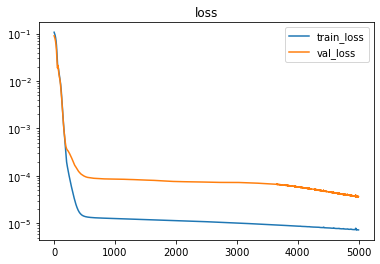

In [10]:
# Monitor learning process
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.yscale('log')
plt.title('loss')
plt.legend()

In [11]:
model.save("my_model")
#model2 = keras.models.load_model('my_model')
#model2.evaluate(X_test_scaled, y_test_scaled) # Returns the loss value & metrics values for the model in test mode.

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model\assets


In [12]:
model.predict(np.array([X_train_scaled[0]]))

array([[0.33004576]], dtype=float32)

In [13]:
data_ind = 0
inp = tf.convert_to_tensor([X_train_scaled[data_ind]])

In [14]:
with tf.GradientTape() as t:
    t.watch(inp)
    output = model(inp)
gradients = t.gradient(output, inp)

In [15]:
gradients[0].numpy()

array([-0.1719117 ,  0.02681757,  0.0668055 ,  0.0124392 , -0.22503313,
       -0.04448193, -0.14377607])

In [16]:
factor = 1e-4
dfdx = []
index = range(X_train_scaled.shape[1])
for ind in index:
#    print(dx)
    tmp1 = copy.deepcopy(X_train_scaled[data_ind])
    value = X_train_scaled[data_ind][ind]
    if value == 0.0:
        tmp1[ind] = value + factor
        dx = factor
    else:           
        tmp1[ind] = value*(1+factor)
        dx = value* factor
    inp_p = tf.convert_to_tensor([tmp1])
    df = (model(inp_p) - model(inp)).numpy()[0][0]
#    print(df)
    g = df/(dx)
    dfdx.append(g)
print('FD gradient ', dfdx)

FD gradient  [-0.171661376953125, 0.027120113372802734, 0.06675720214843747, 0.012516975402832031, -0.22470951080322266, -0.04410743713378906, -0.1436471939086914]


In [17]:
print('automatic diff ', gradients[0].numpy())
print('FD ', dfdx)

automatic diff  [-0.1719117   0.02681757  0.0668055   0.0124392  -0.22503313 -0.04448193
 -0.14377607]
FD  [-0.171661376953125, 0.027120113372802734, 0.06675720214843747, 0.012516975402832031, -0.22470951080322266, -0.04410743713378906, -0.1436471939086914]


In [18]:
X_test_scaled

array([[1. , 0. , 0.5, 1. , 1. , 1. , 1. ],
       [0.5, 0. , 0. , 1. , 1. , 1. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 1. , 0.5, 0. , 1. , 0. ],
       [0. , 0. , 0.5, 1. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 1. , 0. ],
       [0.5, 0. , 1. , 0.5, 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [1. , 0. , 1. , 0.5, 0. , 0. , 0. ],
       [1. , 0. , 0. , 1. , 1. , 1. , 1. ],
       [0. , 0. , 0.5, 1. , 1. , 1. , 1. ],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0.5, 0. , 1. , 0. ]])

In [19]:
len_array = X_test.shape[0]
#C_price_arr = np.zeros(len_array)
delta_arr = np.zeros(len_array)

In [20]:
X_test.min()

k       -0.200000
T        1.000000
v0       0.316228
rho     -1.000000
kappa    0.001000
theta    0.001000
sigma    0.001000
dtype: float64

In [21]:
features = pd.DataFrame({'C_price':y_predict_scaled.flatten(), 'delta':delta_arr})

In [22]:
X_train.iloc[0].values

array([0.        , 1.        , 0.43197516, 0.        , 0.001     ,
       0.001     , 0.001     ])

In [23]:
input_scaler.transform([X_train.iloc[0].values])

array([[0.5, 0. , 0.5, 0.5, 0. , 0. , 0. ]])

In [24]:
input_scaler.scale_

array([2.5       , 1.        , 4.31975162, 0.5       , 0.100005  ,
       0.20002   , 0.100005  ])

In [25]:
print(input_scaler.data_min_)
print(input_scaler.data_max_)
print(input_scaler.data_range_)
print(input_scaler.min_)

[-0.2         1.          0.31622777 -1.          0.001       0.001
  0.001     ]
[ 0.2         1.          0.54772256  1.         10.0005      5.0005
 10.0005    ]
[0.4        0.         0.23149479 2.         9.9995     4.9995
 9.9995    ]
[ 5.00000000e-01 -1.00000000e+00 -1.36602540e+00  5.00000000e-01
 -1.00005000e-04 -2.00020002e-04 -1.00005000e-04]


In [26]:
inp = tf.convert_to_tensor([X_test_scaled])
with tf.GradientTape() as t:
    t.watch(inp)
    output = model(inp)
gradients = t.gradient(output, inp)
dCdk_scaled = gradients[0][:,0].numpy() # dC/dk
features['delta'] = -dCdk_scaled * input_scaler.scale_[0] # dk/dS0 * dk_scaled/dk * dC/dk_scaled

In [27]:
features.describe()

,C_price,delta
count,13.000000,13.000000
mean,0.236661,0.295076
std,0.162847,0.213361
min,0.007155,-0.009421
25%,0.009096,0.010972
50%,0.293715,0.404658
75%,0.361880,0.432695
max,0.419897,0.533625


In [28]:
features['FFT_delta'] = table['delta'][y_test_scaled.index].values
features['k'] = table['k'][y_test_scaled.index].values

In [29]:
features.sort_values('k')

,C_price,delta,FFT_delta,k
2,0.370741,0.533625,1.071527,-0.2
4,0.419897,0.507641,1.024060,-0.2
10,0.007886,0.005316,0.014264,-0.2
1,0.009096,0.010972,0.012801,0.0
3,0.366800,0.404658,0.910965,0.0
5,0.292524,0.469829,0.943706,0.0
6,0.361880,0.377435,0.911231,0.0
7,0.326326,0.421362,0.925633,0.0
11,0.280085,0.432695,0.944165,0.0
12,0.331708,0.407965,0.925003,0.0


In [30]:
X_test_scaled

array([[1. , 0. , 0.5, 1. , 1. , 1. , 1. ],
       [0.5, 0. , 0. , 1. , 1. , 1. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 1. , 0.5, 0. , 1. , 0. ],
       [0. , 0. , 0.5, 1. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 1. , 0. ],
       [0.5, 0. , 1. , 0.5, 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [1. , 0. , 1. , 0.5, 0. , 0. , 0. ],
       [1. , 0. , 0. , 1. , 1. , 1. , 1. ],
       [0. , 0. , 0.5, 1. , 1. , 1. , 1. ],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0.5, 0. , 1. , 0. ]])

In [31]:
"""
# parameters
input_dim = X_train.shape[1]
num_epochs = 50
num_neurons = 128
num_sigmoid = 8
# design the neural network model
model = Sequential()
model.add(Dense(num_neurons, input_dim=input_dim, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(1,activation='tanh')) # Output layer
#model.add(Dense(1,activation='relu')) # Output layer

# define the loss function and optimization algorithm
opt = keras.optimizers.Adam(learning_rate = 0.0005)
model.compile(loss=MeanAbsoluteError(), optimizer=opt, metrics=['mse'])

# ft the model on the training dataset
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=256, verbose=1)
# make predictions for the input data
y_predict = model.predict(X_test)
"""

"\n# parameters\ninput_dim = X_train.shape[1]\nnum_epochs = 50\nnum_neurons = 128\nnum_sigmoid = 8\n# design the neural network model\nmodel = Sequential()\nmodel.add(Dense(num_neurons, input_dim=input_dim, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))\nmodel.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))\nmodel.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))\nmodel.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))\nmodel.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))\nmodel.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))\nmodel.add(Dense(1,activation='tanh')) # Ou